## Forbes Top 2000 Companies Analysis (2022) [CS210 Final Project]


-------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Group Members:** 
- Palak Singh (ps1173)
- Deshna Doshi (dd1035)
- Sangkyun Nam (sn670)
- Apurva Desai (asd187)



**File Directory Information:** 
- _Dataset Analysis & Overview.pdf_: This PDF file contains an overview of the dataset we have chosen for this project and includes a brief introduction into our goals for this analysis. 
- _Glossary.pdf_: This PDF file contains the definition of any necessary terms used in this project. 
- forbes_top_2000.csv: This CSV file is the dataset we have chosen for this project. 
- CS210 Final Project.ipynb: This is the Jupyter Notebook that contains all of the code and analyses. 

Note: We have chosen to not include the Dataset Analysis & Overview PDF file and Glossay PDF file directly in this notebook, because the size of the file was becoming too large and causing a lag when running the notebook. 



**Notebook Structure Information:**
All necessary code is in this Jupyter Notebook. You might need to run a 'pip install' command to download some of the libraries being used in this notebook. Please note that we have made multiple smaller hypotheses throughout our analysis. However, the major/primary hypotheses we will be testing are mentioned in Section III. 

Each section will contain a description of what is being achieved, and a conclusions section detailing what we have learned from the analysis. 

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
# All necessary import statements
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
# A pip install command might be necessary before you run this block of code. 
# Please ensure that these libraries are installed, otherwise you might run into issues in viewing all of the analysis in this notebook. 
import geopandas as gpd
import gender_guesser.detector as gender
from ethnicseer import EthnicClassifier
import seaborn as sns

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

### SECTION I - Data Cleaning and Pre-processing
The following sections of code contain initial cleaning and the necessary pre-processing required to prep the Forbes Top 2000 Companies dataset for analysis.

In [3]:
# Importing the original datasest with the ranking as the index
forbes_df = pd.read_csv("forbes_top_2000.csv", na_values=["NA"])
forbes_df.set_index("2022 Ranking", inplace=True)
forbes_df.head()

,Organization Name,Industry,Country,Year Founded,CEO,Revenue (Billions),Profits (Billions),Assets (Billions),Market Value (Billions),Total Employees
2022 Ranking,,,,,,,,,,
1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000.0
2,ICBC,Banking,China,1984,Shu Gu,208.13,54.03,5518.51,214.42,449296
3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,1933,Amin bin Hasan Al-Nasser,400.38,105.36,576.04,2292.08,68493.0
4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45,271025.0
5,China Construction Bank,Banking,China,2014,Wang Zuji,202.07,46.89,4746.95,181.32,352621


In [4]:
# Describes the shape of the data before it was cleaned. 
print("Pre-processed dataframe shape: ", forbes_df.shape)

Pre-processed dataframe shape:  (1999, 10)


In [5]:
# Cleans and drops any 0 or null values from the dataset, drops any rows with missing information about CEOs.
forbes_df = forbes_df[forbes_df['CEO'] != 'No Name']
forbes_df.dropna(inplace=True)
forbes_df = forbes_df[(forbes_df != 0).all(axis=1)]
forbes_df.head()

,Organization Name,Industry,Country,Year Founded,CEO,Revenue (Billions),Profits (Billions),Assets (Billions),Market Value (Billions),Total Employees
2022 Ranking,,,,,,,,,,
1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000.0
2,ICBC,Banking,China,1984,Shu Gu,208.13,54.03,5518.51,214.42,449296
3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,1933,Amin bin Hasan Al-Nasser,400.38,105.36,576.04,2292.08,68493.0
4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45,271025.0
5,China Construction Bank,Banking,China,2014,Wang Zuji,202.07,46.89,4746.95,181.32,352621


In [6]:
# Clean up the Total Employee column
forbes_df['Total Employees'] = forbes_df['Total Employees'].str.replace(']', '')
forbes_df['Total Employees'] = forbes_df['Total Employees'].str.replace('.0', '')
forbes_df['Total Employees'] = forbes_df['Total Employees'].astype(int)

In [7]:
# Describes the shape of the data after it was cleaned. This helps us determine exactly how many null/0 values were removed from the dataset.
print("Post-processed dataframe shape: ", forbes_df.shape)

Post-processed dataframe shape:  (1901, 10)


-------------------------------------------------------------------------------------------------------------------------------------------------------------------

### SECTION II - General Analysis


##### II-A: Trends in "Country" Column

II-A.1: Here, we created a heatmap to see the distribution of the countries where the companies were founded.
We can see that most of the companies were founded in United States, China, and Japan. This is expected because today, these countries are considered some of the most technologically advanced and successful companies. Note: Any countries that are not mentioned or included in the dataset are greyed out. 

C:\Users\deshn\AppData\Local\Temp\ipykernel_24740\619946711.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


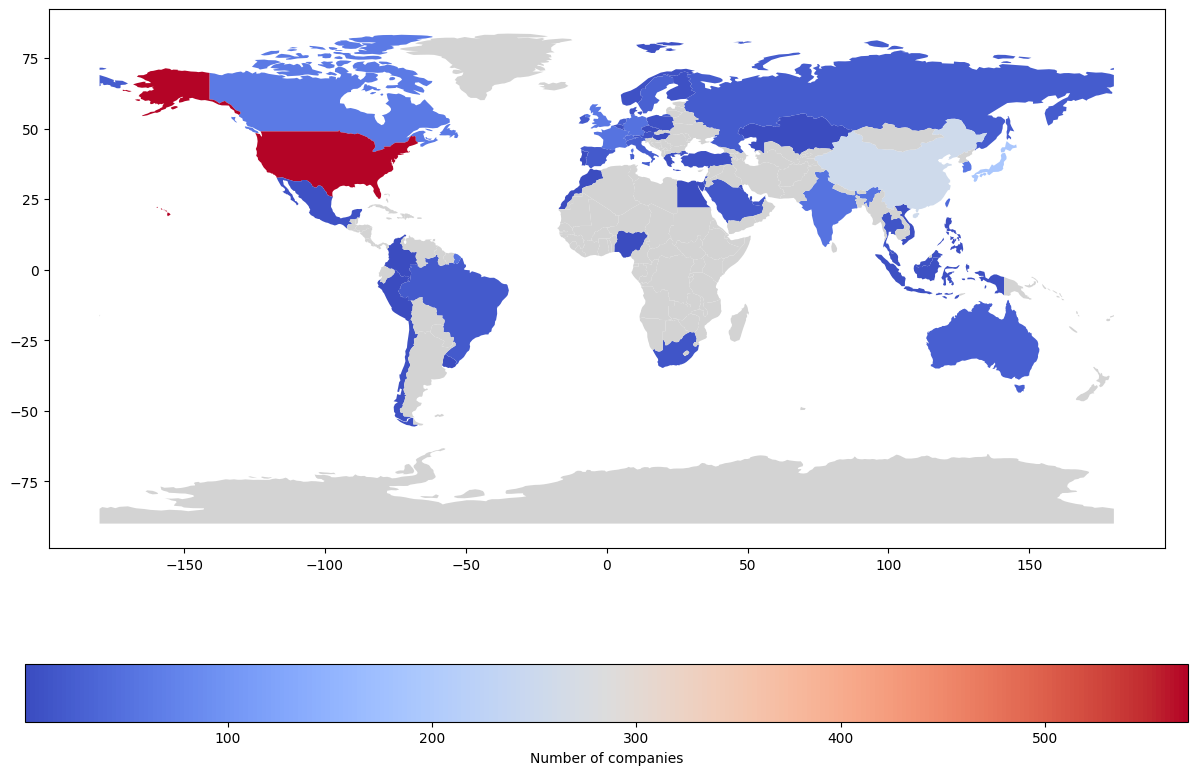

In [8]:
# Convert country counts to a dictionary
country_count = forbes_df["Country"].value_counts().to_dict()

# Create a dataframe from the dictionary
country_count_df = pd.DataFrame.from_dict(country_count, orient='index', columns=['Count'])
country_count_df.rename(index={'United States': 'United States of America'}, inplace=True)
country_count_df.rename(index={'Czech Republic': 'Czechia'}, inplace=True)

# Load a world map shapefile using GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge with a world map shapefile
merged = world.merge(country_count_df, left_on='name', right_index=True, how='left')

# # Fill missing values (countries with no data) with 0
# merged['Count'].fillna(0, inplace=True)

# Plot the merged dataframe
merged.plot(column='Count', cmap='coolwarm', legend=True,
            legend_kwds={'label': "Number of companies", 'orientation': "horizontal"},
            figsize=(15, 10),
            missing_kwds={"color": "lightgrey"})

plt.show()


##### II-B: Trends in the "Year Founded" Column
In Section II-B, we will be performing an analysis on the trends in the 'Year Founded' column.

II-B.1: Here, we begin by generating a histogram to depict the distribution of years the most successful companies were founded in. We notice a peak in the 1900s-2000s. This can be explained by the rise and proliferation of technology. 

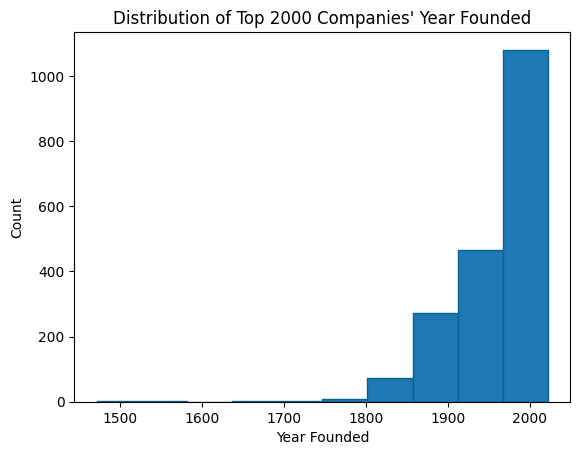

In [9]:
forbes_df.hist(column='Year Founded', grid=False, edgecolor='#056590')

plt.xlabel('Year Founded')
plt.ylabel('Count')
plt.title('Distribution of Top 2000 Companies\' Year Founded')
plt.show()

II-B.2: To examine the data more closely, we will specifically be focusing on the years after 1800. We notice a spike in the late 1900s, post 1950. Once again, this spike can be explained by the increasing use and development of technologies that happened in the later 1900s and early 2000s.

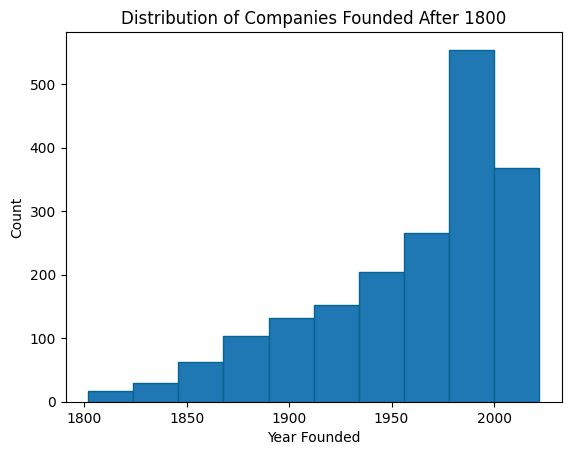

In [10]:
# We can take a closer look at the upward trend in the data. 
# If we examine the graph closely, we'll notice that the late 1900s saw a boom, in the growth of different industries.

companies_1800s = forbes_df[forbes_df['Year Founded'] > 1800]
companies_1800s.hist(column='Year Founded', grid=False, edgecolor='#056590')

plt.xlabel('Year Founded')
plt.ylabel('Count')
plt.title('Distribution of Companies Founded After 1800')
plt.show()

II-B.3: We further narrow down this range of years to determine the year in which most companies popped up. In 1997, we see a spike in the graph. Coincedentally, the later 1900s is when the world saw an internet boom. As a result, many new companies that began in the 1990s saw tremendous growth.  

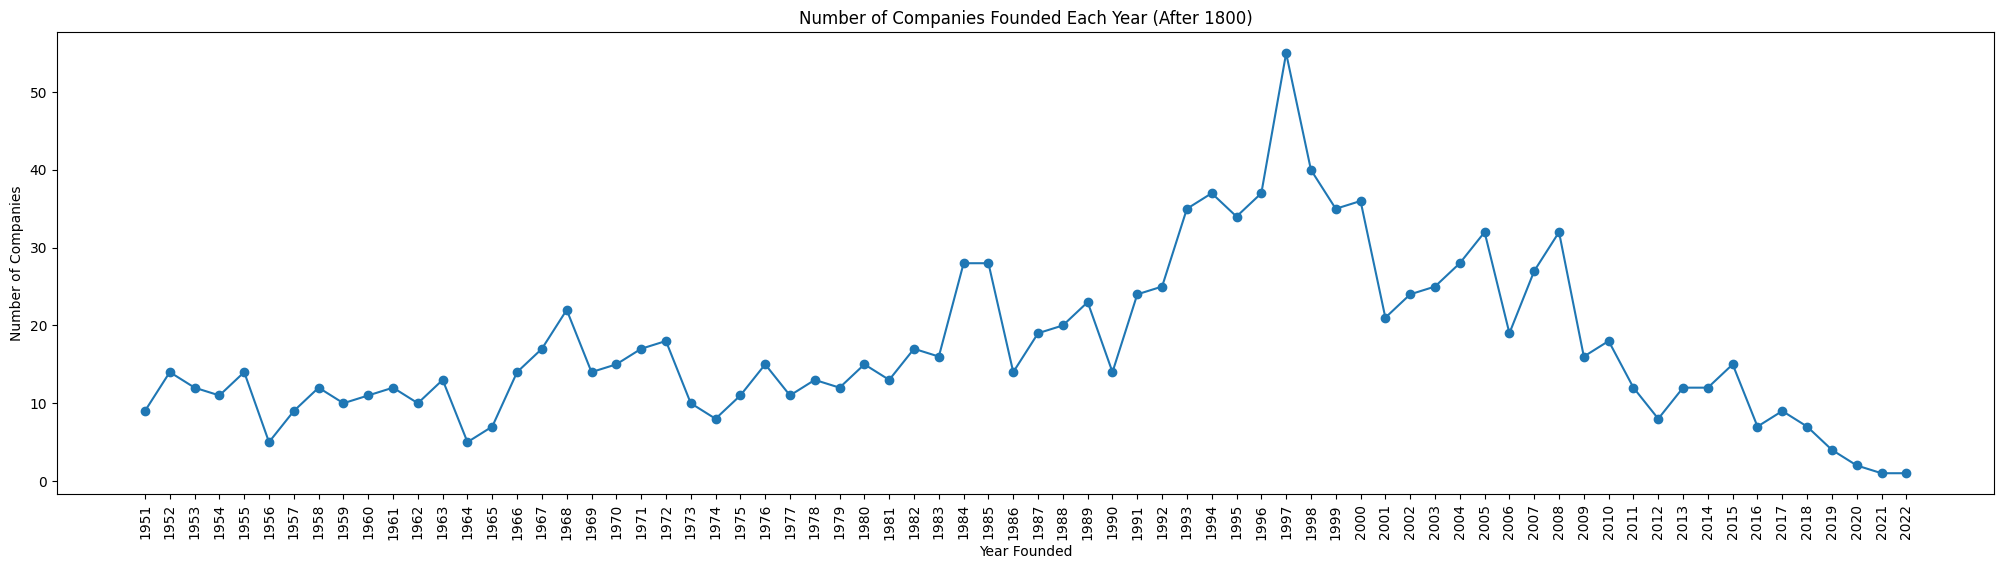

In [11]:
# We can further narrow this range down to inspect the trend in the founding year of companies that were successful in 2022. 
companies_1950s = forbes_df[forbes_df['Year Founded'] > 1950]
companies_groupby_year = companies_1950s.groupby('Year Founded').size()

plt.figure(figsize=(25, 6))
plt.plot(companies_groupby_year.index, companies_groupby_year.values, marker='o', linestyle='-')

plt.xticks(companies_groupby_year.index, rotation=90)

plt.xlabel('Year Founded')
plt.ylabel('Number of Companies')
plt.title('Number of Companies Founded Each Year (After 1800)')
plt.show()

##### II-C: Trends in the 'Industry' Column

In Section II-C, we will be performing an analysis on the trends in the 'Industry' column.

II-C.1: Here, we begin by simply detailing all of the unique industries that are mentioned in the dataframe. There are a total of 29 industries.

In [12]:
print("The following industries made it to the Top 2000 list:", forbes_df["Industry"].unique())

The following industries made it to the Top 2000 list: ['Diversified Financials' 'Banking' 'Oil & Gas Operations' 'Retailing'
 'Technology Hardware & Equipment' 'Consumer Durables'
 'IT Software & Services' 'Insurance' 'Telecommunications Services'
 'Media' 'Drugs & Biotechnology' 'Food, Drink & Tobacco' 'Semiconductors'
 'Household & Personal Products' 'Materials' 'Conglomerates'
 'Trading Companies' 'Transportation' 'Construction' 'Aerospace & Defense'
 'Utilities' 'Health Care Equipment & Services' 'Chemicals'
 'Capital Goods' 'Business Services & Supplies'
 'Hotels, Restaurants & Leisure' 'Food Markets' 'Food & Drink'
 'Automotive']


II-C.2: Here, we use a bar graph to determine the most popular industries. Based on the current market trends, we hypothesize that the most common industry will be IT Software & Services. 

<Axes: title={'center': 'Distribution of Industry'}, xlabel='Industry', ylabel='Count'>

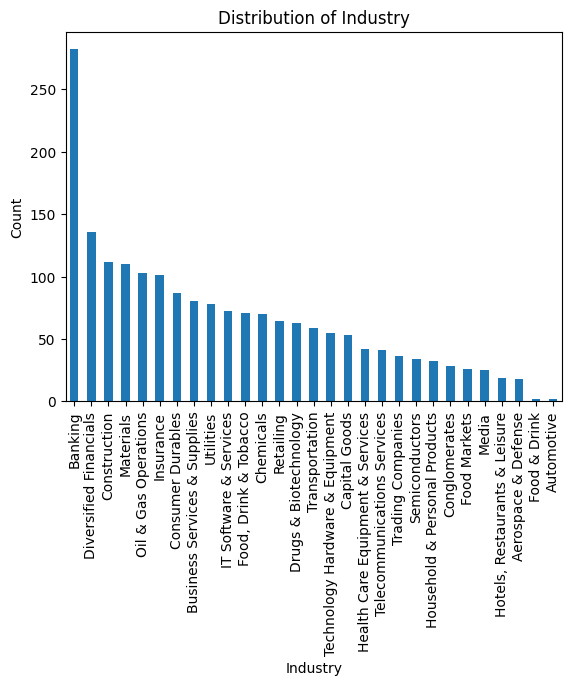

In [13]:
industry_counts = forbes_df["Industry"].value_counts()

plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Distribution of Industry')

industry_counts.plot.bar()

Our hypothesis has proven to be false. The most common industry is banking, followed closely by diversified financials. 

II-C.3: Here, we use a bar chart to determine which industries were the most popular in any given year. We have chosen to define a popular industry as an industry when more than two companies have popped up in the same year in that industry. We hypothesize that the most common industries will be banking, but in the late 1900s, the most common industry will be IT software and services. 

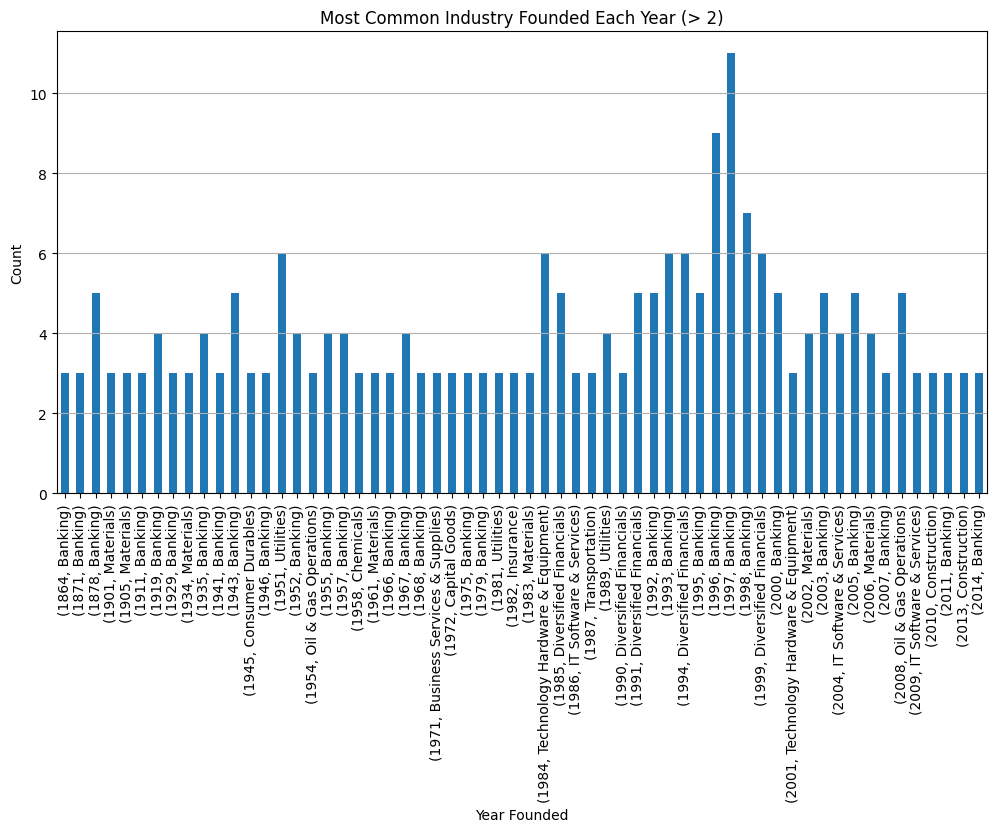

In [14]:
industry_counts = forbes_df.groupby(['Year Founded', 'Industry']).size()
most_common_industry_index = industry_counts.groupby('Year Founded').idxmax()
most_common_industry = industry_counts.loc[most_common_industry_index]

most_common_industry_filtered = most_common_industry[most_common_industry > 2]

plt.figure(figsize=(12, 6))
most_common_industry_filtered.plot(kind='bar')

plt.title('Most Common Industry Founded Each Year (> 2)')

plt.xlabel('Year Founded')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.grid(axis='y')
plt.show()


Our hypothesis is partially true. Banking remains the chart topper in most years. Technology and IT Software/Services pick up in the early 2000s, instead of later 1900s as we'd predicted.

##### II-D: Gender Analysis in the 'CEO' Column 
In Section II-D, we will be performing an gender analysis on the 'CEO' column by using the 'gender_guesser' library. 

II-D.1: We begin by updating and creating a new dataframe that will store the predicted genders of all of the CEOs in the dataset. This dataframe will be cleaned, with any rows where the gender is 'undertermined' dropped. 

In [15]:
gender_analysis_df = forbes_df.copy()

detector = gender.Detector()

def predict_gender(name):
    first_name = name.split()[0]
    gender_result = detector.get_gender(first_name)
    if gender_result == "male" or gender_result == "female" or gender_result == "mostly_male" or gender_result == "mostly_female":
        return gender_result
    else:
        return None

gender_analysis_df['First Name'] = gender_analysis_df['CEO'].str.split().str[0]
gender_analysis_df['Gender'] = gender_analysis_df['First Name'].apply(predict_gender)

gender_analysis_df.head(10)

,Organization Name,Industry,Country,Year Founded,CEO,Revenue (Billions),Profits (Billions),Assets (Billions),Market Value (Billions),Total Employees,First Name,Gender
2022 Ranking,,,,,,,,,,,,
1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000,Warren,male
2,ICBC,Banking,China,1984,Shu Gu,208.13,54.03,5518.51,214.42,449296,Shu,None
3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,1933,Amin bin Hasan Al-Nasser,400.38,105.36,576.04,2292.08,68493,Amin,male
4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45,271025,Jamie,mostly_female
5,China Construction Bank,Banking,China,2014,Wang Zuji,202.07,46.89,4746.95,181.32,352621,Wang,None
6,Amazon,Retailing,United States,1994,Andy Jassy,469.82,33.36,420.55,1468.40,1608000,Andy,male
7,Apple,Technology Hardware & Equipment,United States,1976,Tim Cook,378.70,100.56,381.19,2640.32,154000,Tim,male
8,Agricultural Bank of China,Banking,China,1979,Gu Shu,181.42,37.38,4561.05,133.38,455174,Gu,None
9,Bank of America,Banking,United States,1998,Brian Moynihan,96.83,31.00,3238.22,303.10,208000,Brian,male


In [16]:
# Dropping the rows where the gender analysis was unsuccessful (returned None).
gender_analysis_df = gender_analysis_df.dropna(subset=['Gender'])

II-D.2: Here, we use a bar graph to represent the quantity of the CEO's genders. Based on common knowledge, we assume that most CEOs will be male. 

<Axes: title={'center': 'Distribution of CEO Gender'}, xlabel='Gender', ylabel='Count'>

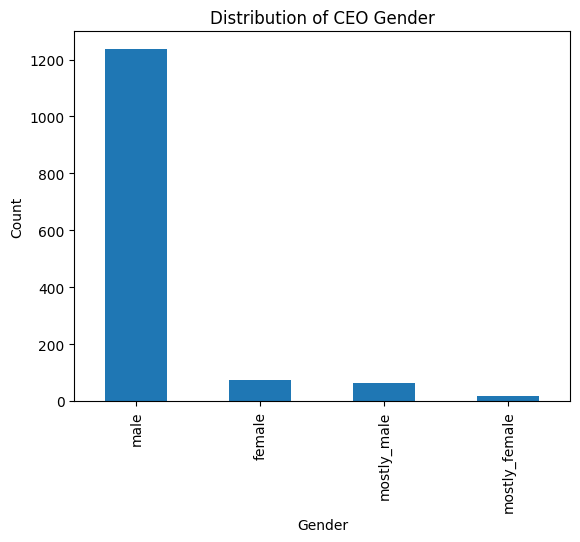

In [17]:
gender_counts = gender_analysis_df['Gender'].value_counts(dropna=False)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of CEO Gender')
gender_counts.plot.bar()


Our hypothesis has proven to be true. The quantity of male CEOs is much higher than female CEOs. Similar patterns are seen for the 'mostly_male' CEOs and 'mostly_female' CEOs. 

II-D.3: Here, we use a comparative bar graph to compare the number of male and female CEOs in each industry. We expect the banking and automotive industries to have more men than women. 

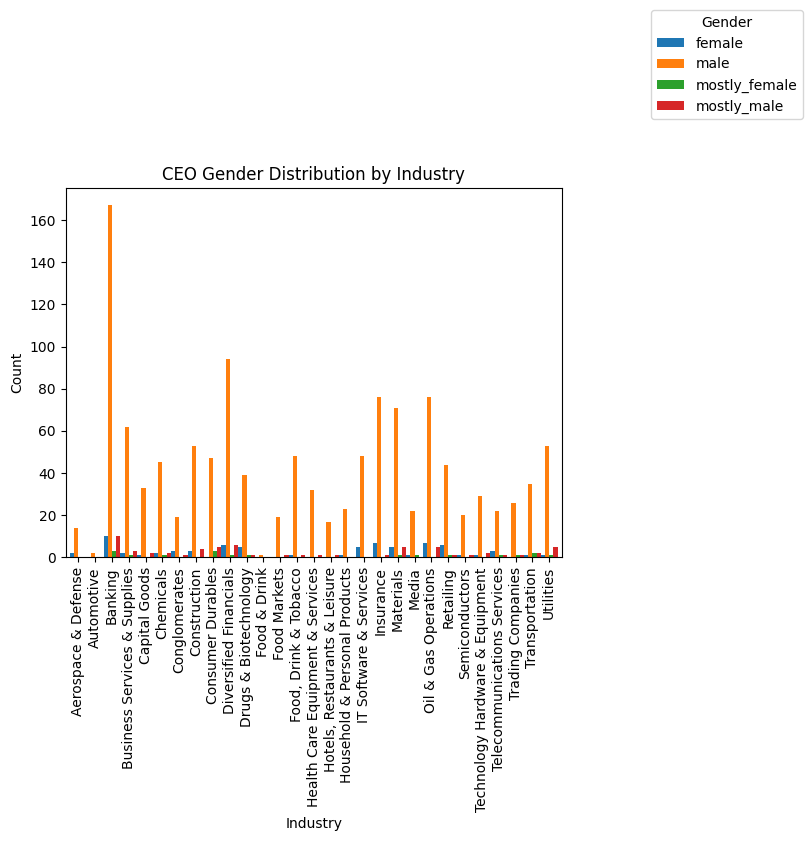

In [18]:
industry_gender_counts = gender_analysis_df.groupby(['Industry', 'Gender']).size().unstack(fill_value=0)

industry_gender_counts.plot(kind='bar', width=1.0)  
plt.title('CEO Gender Distribution by Industry')
plt.xlabel('Industry')
plt.ylabel('Count')

plt.xticks(rotation=90)  

plt.legend(title='Gender', loc='upper right', bbox_to_anchor=(1.5, 1.5))  
plt.show()


Our hypothesis has proven to be true. The banking industry primary has male CEOs. From the chart, it seems as though the automotive industry has close to no female CEOs.

II-D.4: Here, we perform an analyssi on the gender_counts dataframe to determine which industries men and women dominate. 

In [19]:
industry_gender_counts['total_male'] = industry_gender_counts['male'] + industry_gender_counts['mostly_male']
industry_gender_counts['total_female'] = industry_gender_counts['female'] + industry_gender_counts['mostly_female']

most_male_industry = industry_gender_counts['total_male'].idxmax()
most_female_industry = industry_gender_counts['total_female'].idxmax()

least_male_industry = industry_gender_counts['total_male'].idxmin()
least_female_industry = industry_gender_counts['total_female'].idxmin()

print("Industry with the most male CEOs:", most_male_industry)
print("Industry with the least male CEOs:", least_male_industry)

print("Industry with the most female CEOs:", most_female_industry)
print("Industry with the least female CEOs:", least_female_industry)


Industry with the most male CEOs: Banking
Industry with the least male CEOs: Food & Drink
Industry with the most female CEOs: Banking
Industry with the least female CEOs: Automotive


#### II-E: Ethnicity Analysis in the 'CEO' Column

In Section II-E, we will be performing an ethnicity analysis on the 'CEO' column by using the 'ethincseer' library. 

II-E.1: We begin with a bar graph that depicts the frequencies of the predicted ethnicities of the CEOs. From prior analysis, we notice that USA and China are the leading countries in the top 2000 companies dataset. As a result, we hypothesize: _If the USA and China are the most common countries in the dataset, the most common CEO ethnicity should be 'English' or 'Chinese'._

C:\Users\deshn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 1.0.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\deshn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


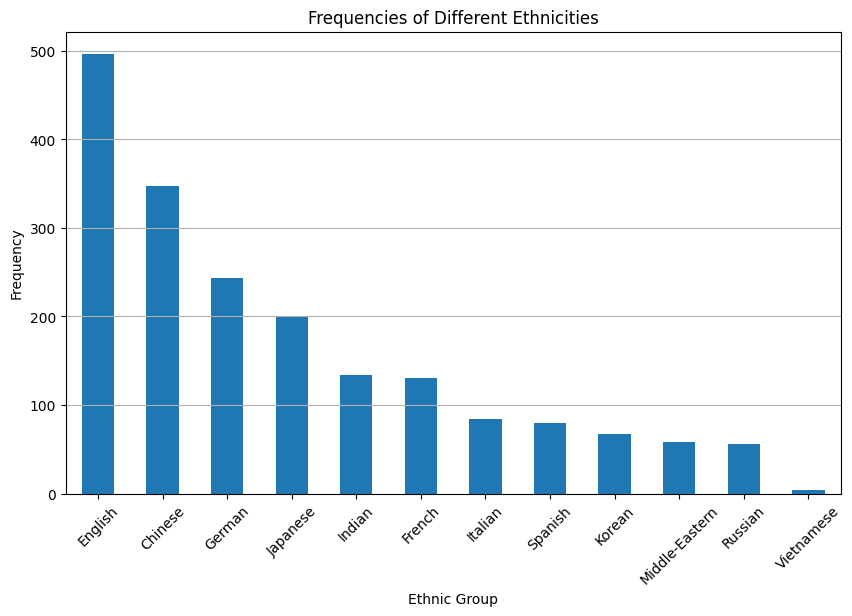

In [20]:
ec = EthnicClassifier.load_pretrained_model()

industries = forbes_df['Industry']
years = forbes_df['Year Founded']

names = forbes_df['CEO']
ethnic_groups = ec.classify_names(names)

ethnic_group_mapping = {
    'chi': 'Chinese',
    'eng': 'English',
    'ger': 'German',
    'jap': 'Japanese',
    'ind': 'Indian',
    'frn': 'French',
    'ita': 'Italian',
    'spa': 'Spanish',
    'kor': 'Korean',
    'mea': 'Middle-Eastern',
    'rus': 'Russian',
    'vie': 'Vietnamese'
}

ethnic_groups_renamed = [ethnic_group_mapping.get(group, group) for group in ethnic_groups]

ceo_ethnicity_df = pd.DataFrame({'CEO': names, 'Industry': industries, 'Year Founded': years, 'Ethnic Group': ethnic_groups_renamed})
ethnicity_counts = ceo_ethnicity_df['Ethnic Group'].value_counts()

ethnicity_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Frequencies of Different Ethnicities')
plt.xlabel('Ethnic Group')
plt.ylabel('Frequency')

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Our hypothesis has been proven to be true. 

II-E.2: Here, we determine the most prominent ethnic group in each industry and represent it as a percentage. This allows us to understand which industries are more diversified than others. From prior analysis, banking was the most prominent industry. As a result, we hypothesize: _If banking is the most prominent industry, then it is more likely to be the most diversified in terms of ethnic make-up of its CEOs_. 

In [21]:
grouped_df_ethn_ind = ceo_ethnicity_df.groupby(['Industry', 'Ethnic Group']).size().unstack(fill_value=0)

most_prominent_ethnic_group = grouped_df_ethn_ind.idxmax(axis=1)

total_ceos_by_industry = ceo_ethnicity_df['Industry'].value_counts()

percentages_by_ethnicity = grouped_df_ethn_ind.div(total_ceos_by_industry, axis=0) * 100

data = []
for industry, ethnic_group in most_prominent_ethnic_group.items():
    percentage = percentages_by_ethnicity.loc[industry, ethnic_group]
    data.append((industry, ethnic_group, percentage))

sorted_data = sorted(data, key=lambda x: x[2])

for industry, ethnic_group, percentage in sorted_data:
    print(f"{industry}, Most Prominent Ethnic Group: {ethnic_group}, Percentage: {percentage:.2f}%")


Banking, Most Prominent Ethnic Group: Chinese, Percentage: 18.79%
Telecommunications Services, Most Prominent Ethnic Group: Chinese, Percentage: 19.51%
Household & Personal Products, Most Prominent Ethnic Group: English, Percentage: 21.88%
Drugs & Biotechnology, Most Prominent Ethnic Group: English, Percentage: 22.22%
IT Software & Services, Most Prominent Ethnic Group: English, Percentage: 23.61%
Consumer Durables, Most Prominent Ethnic Group: Japanese, Percentage: 24.14%
Chemicals, Most Prominent Ethnic Group: English, Percentage: 24.29%
Capital Goods, Most Prominent Ethnic Group: Chinese, Percentage: 24.53%
Trading Companies, Most Prominent Ethnic Group: Japanese, Percentage: 25.00%
Materials, Most Prominent Ethnic Group: English, Percentage: 25.45%
Utilities, Most Prominent Ethnic Group: English, Percentage: 26.92%
Food, Drink & Tobacco, Most Prominent Ethnic Group: English, Percentage: 28.17%
Transportation, Most Prominent Ethnic Group: English, Percentage: 28.81%
Semiconductors, 

Our hypothesis has proven to be true. Banking has the most diversified ethinic group in its CEOs, with Chinese CEOs, making up a majority, with only an 18.79%. 

II-E.3: Here, we compare the ethinic groups of CEOs in the top 10 companies with a stacked bar graph. From prior analysis, we expect banking to contain most (if not all) ethnic groups. 

<Figure size 1200x800 with 0 Axes>

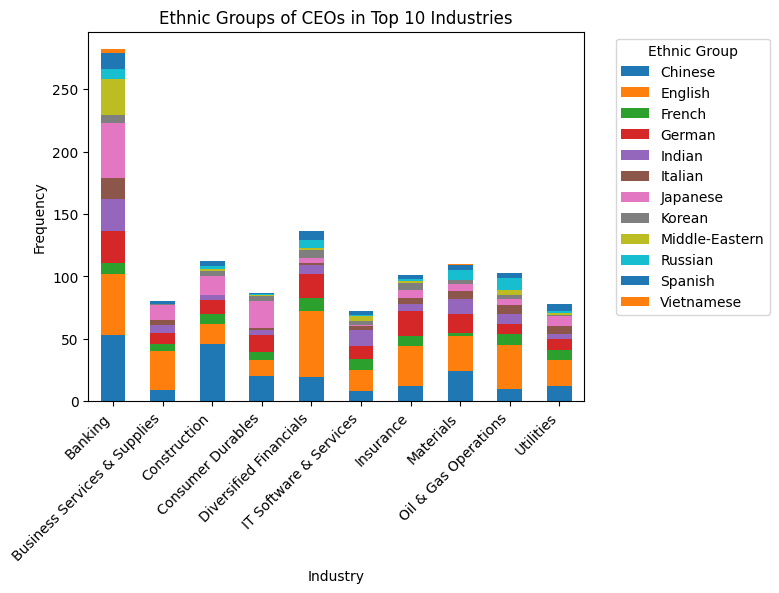

In [22]:
top_10_industries = ceo_ethnicity_df['Industry'].value_counts().head(10).index
ceo_ethnicity_top_10 = ceo_ethnicity_df[ceo_ethnicity_df['Industry'].isin(top_10_industries)]
grouped_df_top_10 = ceo_ethnicity_top_10.groupby(['Industry', 'Ethnic Group']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
grouped_df_top_10.plot(kind='bar', stacked=True)

plt.title('Ethnic Groups of CEOs in Top 10 Industries')
plt.xlabel('Industry')
plt.ylabel('Frequency')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Ethnic Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### II-F: Number of Employees Analysis


In Section II-F, we will be analyzing the relationship of the column 'Total Employees' to different columns in the dataset. 

II-F-1. We begin with a bar graph depicting the total number of employees across each industry from the dataset. From prior analysis, we concluded that the most common industry was banking. As a result, we hypothesize the followng: _If banking is the most popular industry, then the total employees in the banking industry should be larger than all other industries._

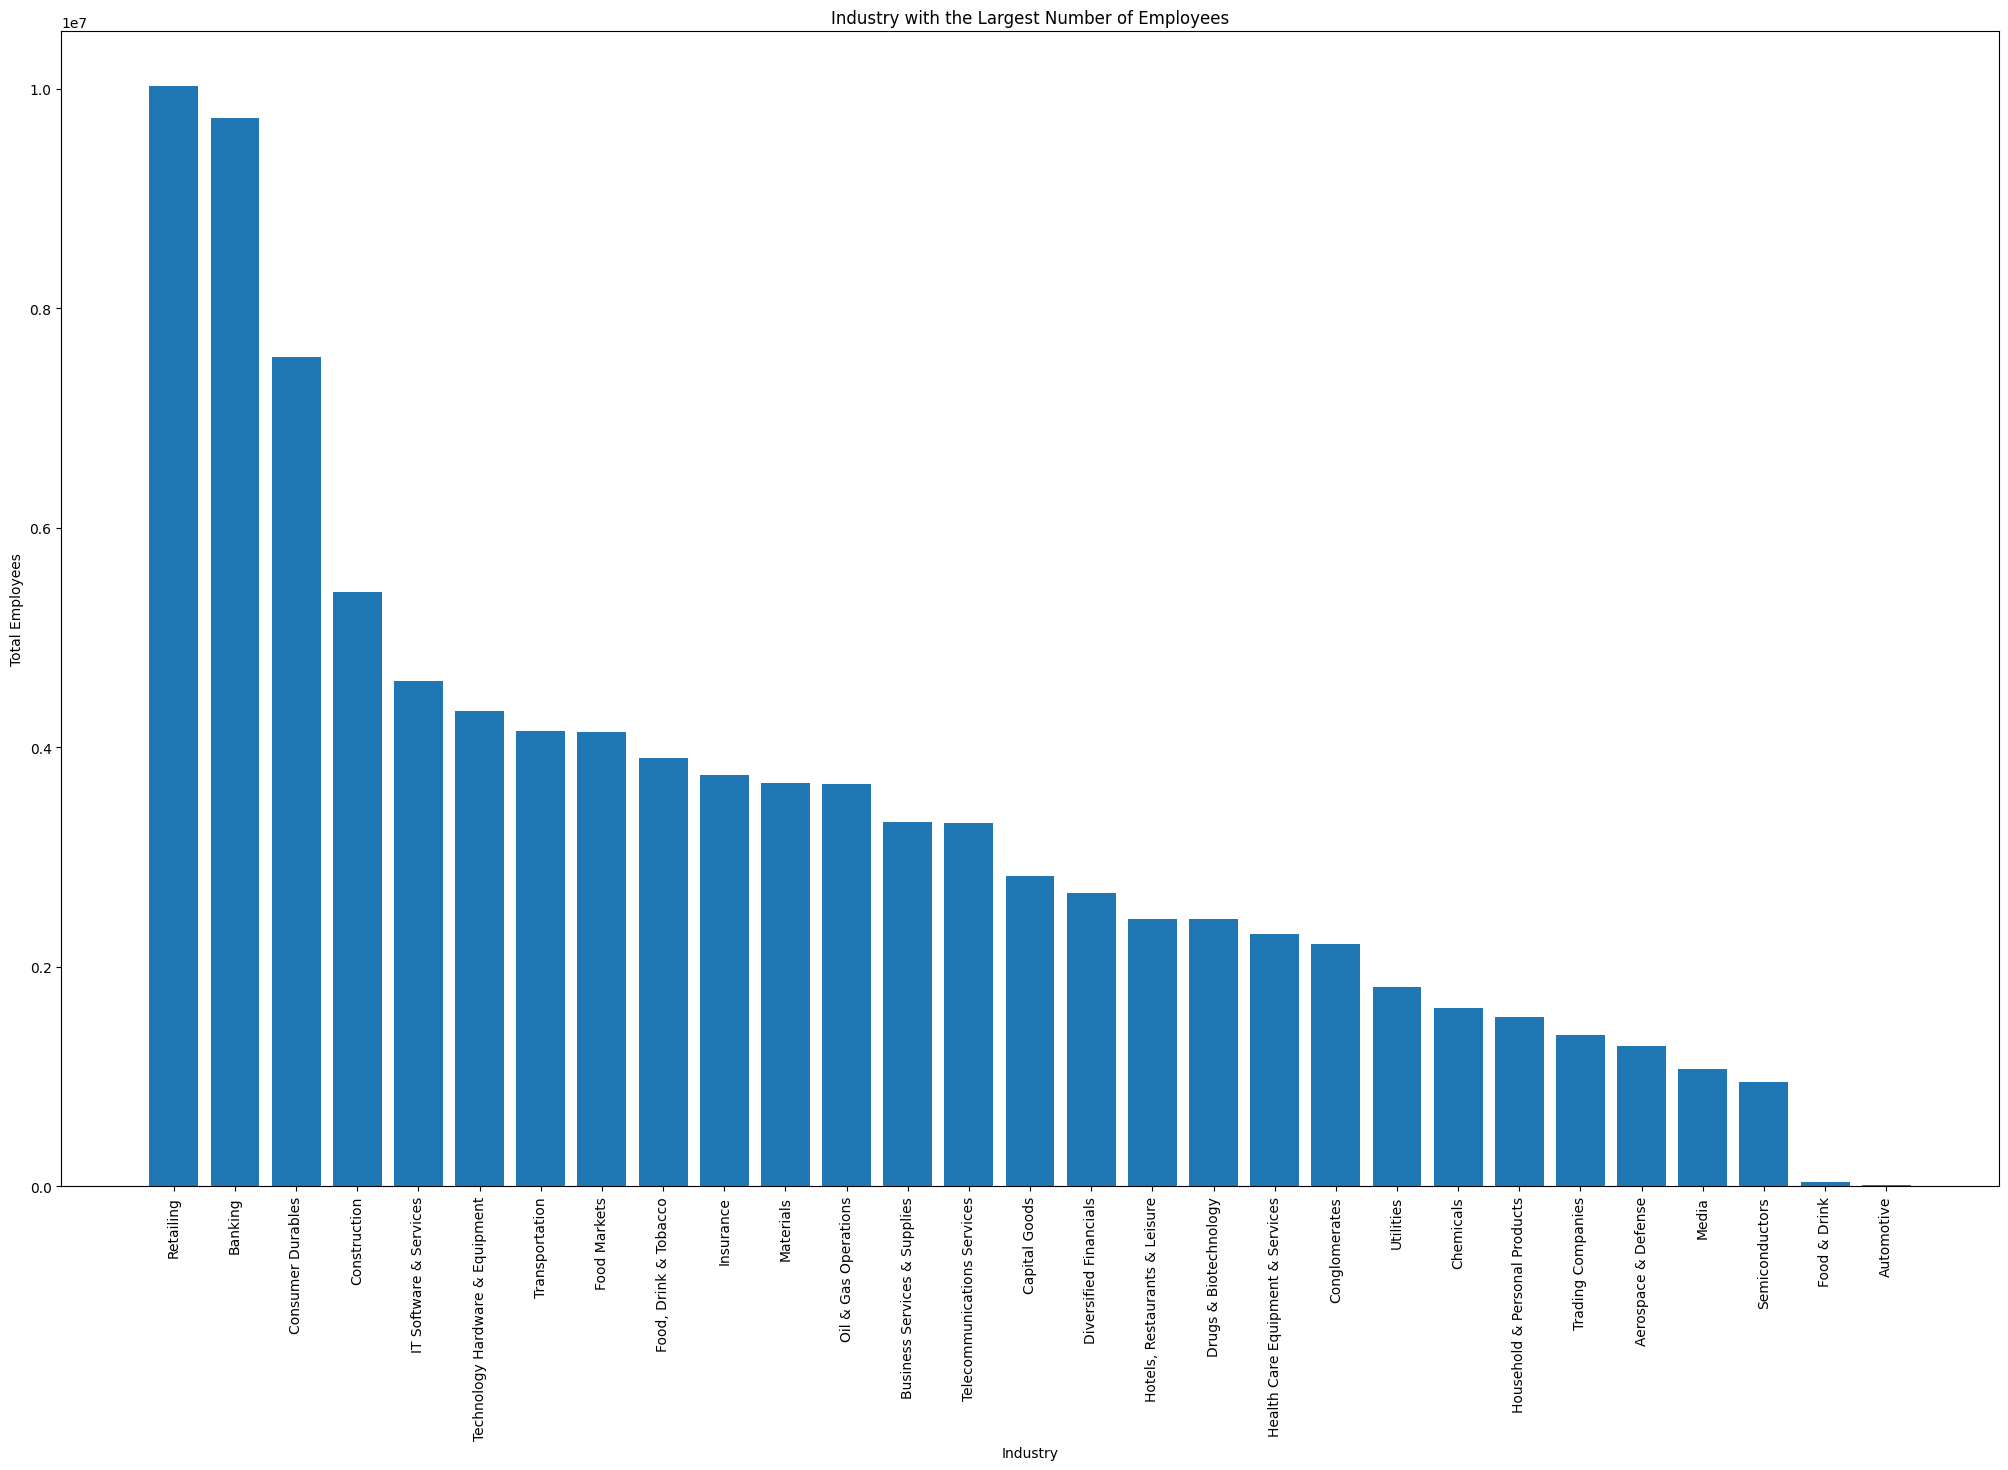

In [23]:
industry_employees = forbes_df.groupby('Industry')['Total Employees'].sum().sort_values(ascending=False)

plt.figure(figsize=(25, 15))
plt.bar(industry_employees.index, industry_employees.values)
plt.xlabel('Industry')
plt.ylabel('Total Employees')
plt.title('Industry with the Largest Number of Employees')
plt.xticks(rotation=90)
plt.show()

Here, our hypothesis has proven to be false. The leading industry in terms of employee counts is retailing. The retail industry is widely popular and employees people not only on the corporate level, but also on a customer service and user-interaction level. For example, Walmart has employees in its stores, as well as employees that manage technical and business operations that are not user-facing. Hence, retail employing the largest number of people is justifiable. 

II-F-2. Here, we use a bar graph to describe the employee count distribution across the top 50 companies in the dataset. From prior analysis, we can hypothesize: _If the largest industry is retail, then the leading employer should be a retail company._

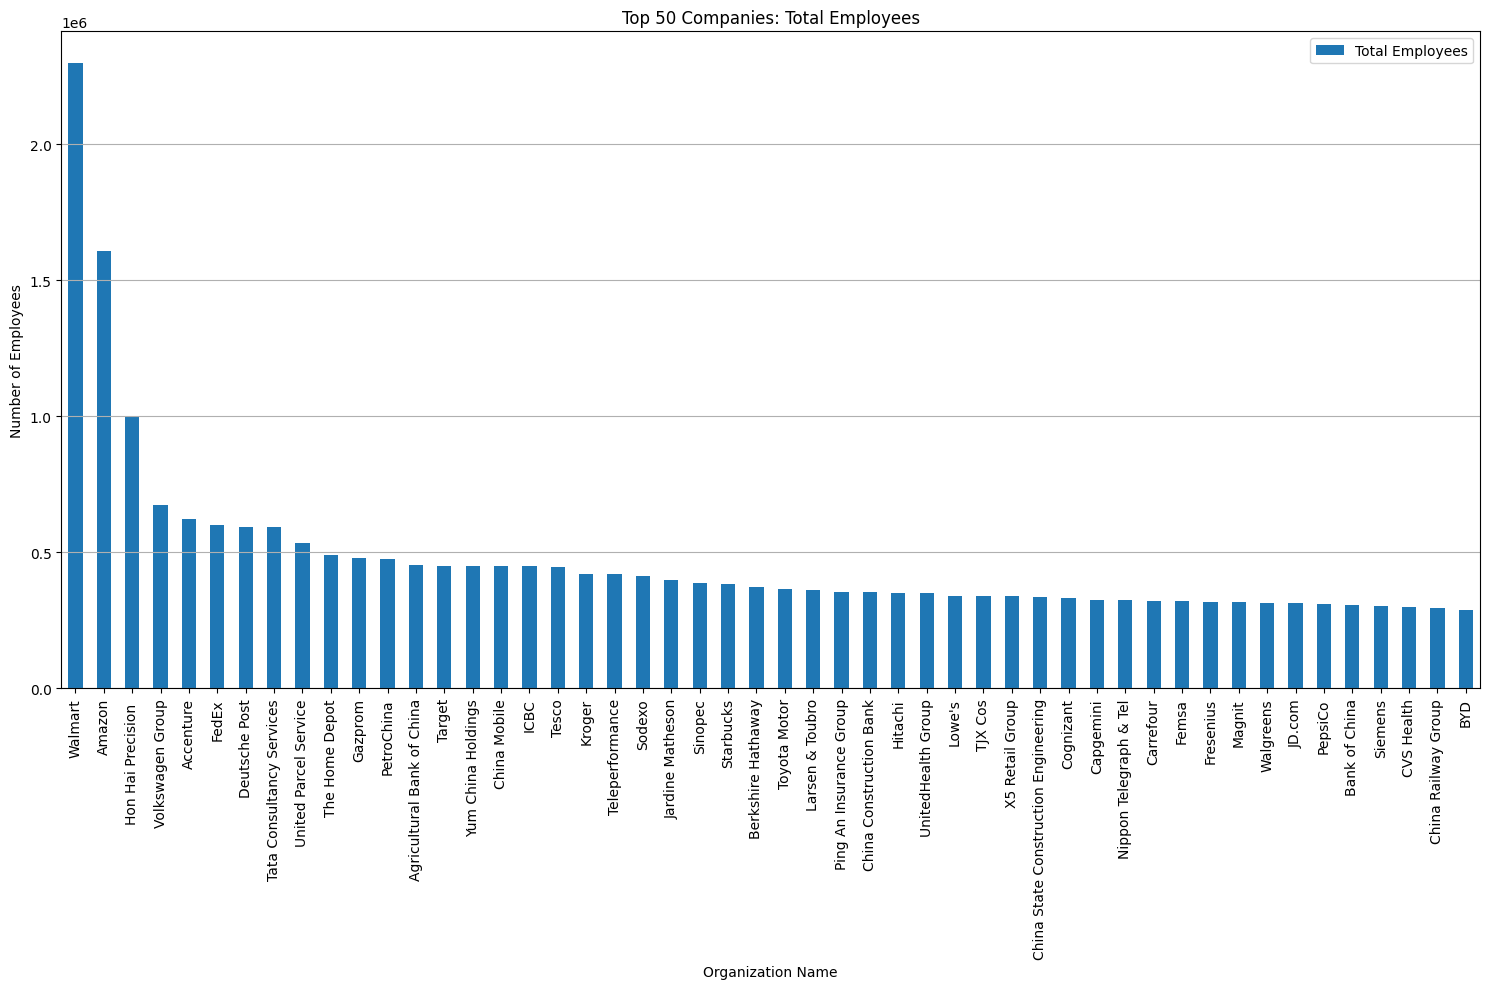

In [24]:
industry_totals = forbes_df.groupby('Organization Name')[['Total Employees']].sum()

industry_totals_sorted = industry_totals.sort_values(by='Total Employees', ascending=False)

top_50_industries = industry_totals_sorted.head(50)

top_50_industries.plot(kind='bar', figsize=(15, 10))
plt.title('Top 50 Companies: Total Employees')
plt.xlabel('Organization Name')
plt.ylabel('Number of Employees')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Here, our hypothesis has proven to be true. Walmart is in the retail industry and is the leading employer. 

II-F-3. Here, we use a scatter plot to describe the relationship between company revenue and the total employees. We  hypothesize: _If a company has a larger revenue, then the company employees a larger number of employees._

Text(0, 0.5, 'Number of Employees')

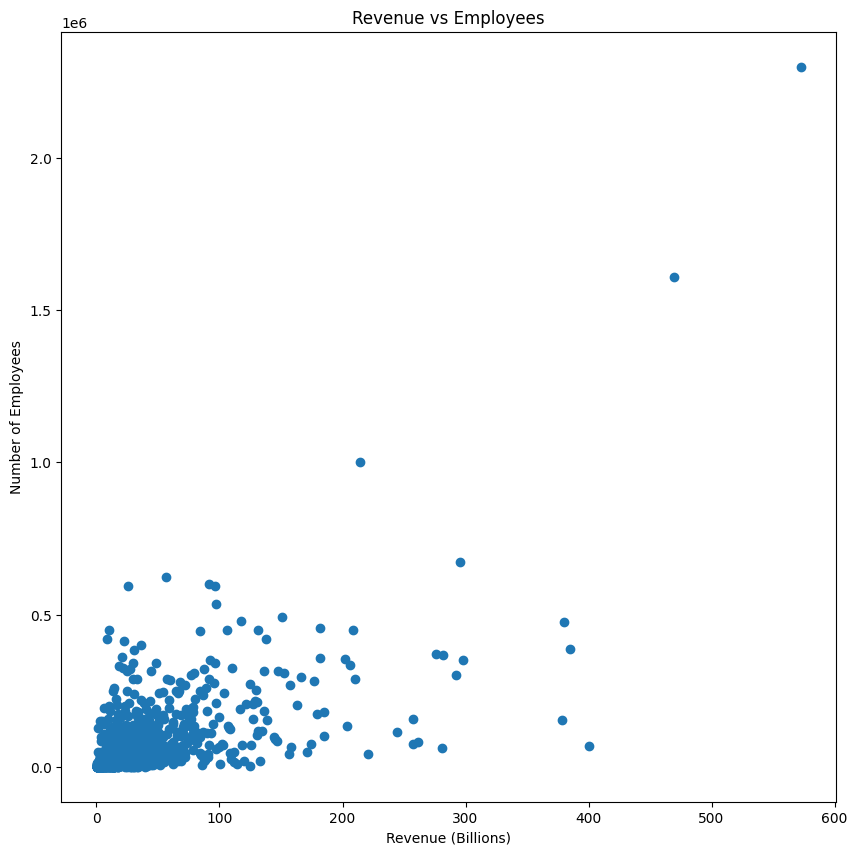

In [25]:
plt.figure(figsize=(10, 10))
plt.scatter(forbes_df['Revenue (Billions)'], forbes_df['Total Employees'])

plt.title('Revenue vs Employees')
plt.xlabel('Revenue (Billions)')
plt.ylabel('Number of Employees')

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

### SECTION III - Advanced Analysis


In this section, we hope to test our primary hypothesis through more advanced forms of analysis. 

#### Primary Hypotheses:
1. If Forbes has taken into account non-financial metrics (such as sustainable practices, employee retention/satisfaction) to determine the ranking of the companies, then the financial metrics analysis we perform will lead to a vastly differently ranking for the top 2000 companies. 

2. If the banking industry has been leading across various metrics as seen in Section II - General Analysis, then the banking industry will rank within the top 5 overall industries. We hypothesize that the popularity of each industry (or, frequency at which it appears in the dataset), will be strongly correlated to its overall industry ranking

3. If a industry ranks higher overall, then it is more likely to employee a larger number of people. We hypothesize that there will be a directly proportional relationship between industry ranking and employee counts. 
 

#### III-A: Top 50 Industries Based on Financial Metrics 
In Section III-A, we will be analyzing the top 50 industries based on financial metrics such as revenue, profit, market value, and asset value. 

III-A-1. To begin, we use a bar graph to compare the top 50 industries to the revenue they generate. We expect banking to top the charts in this plot. 

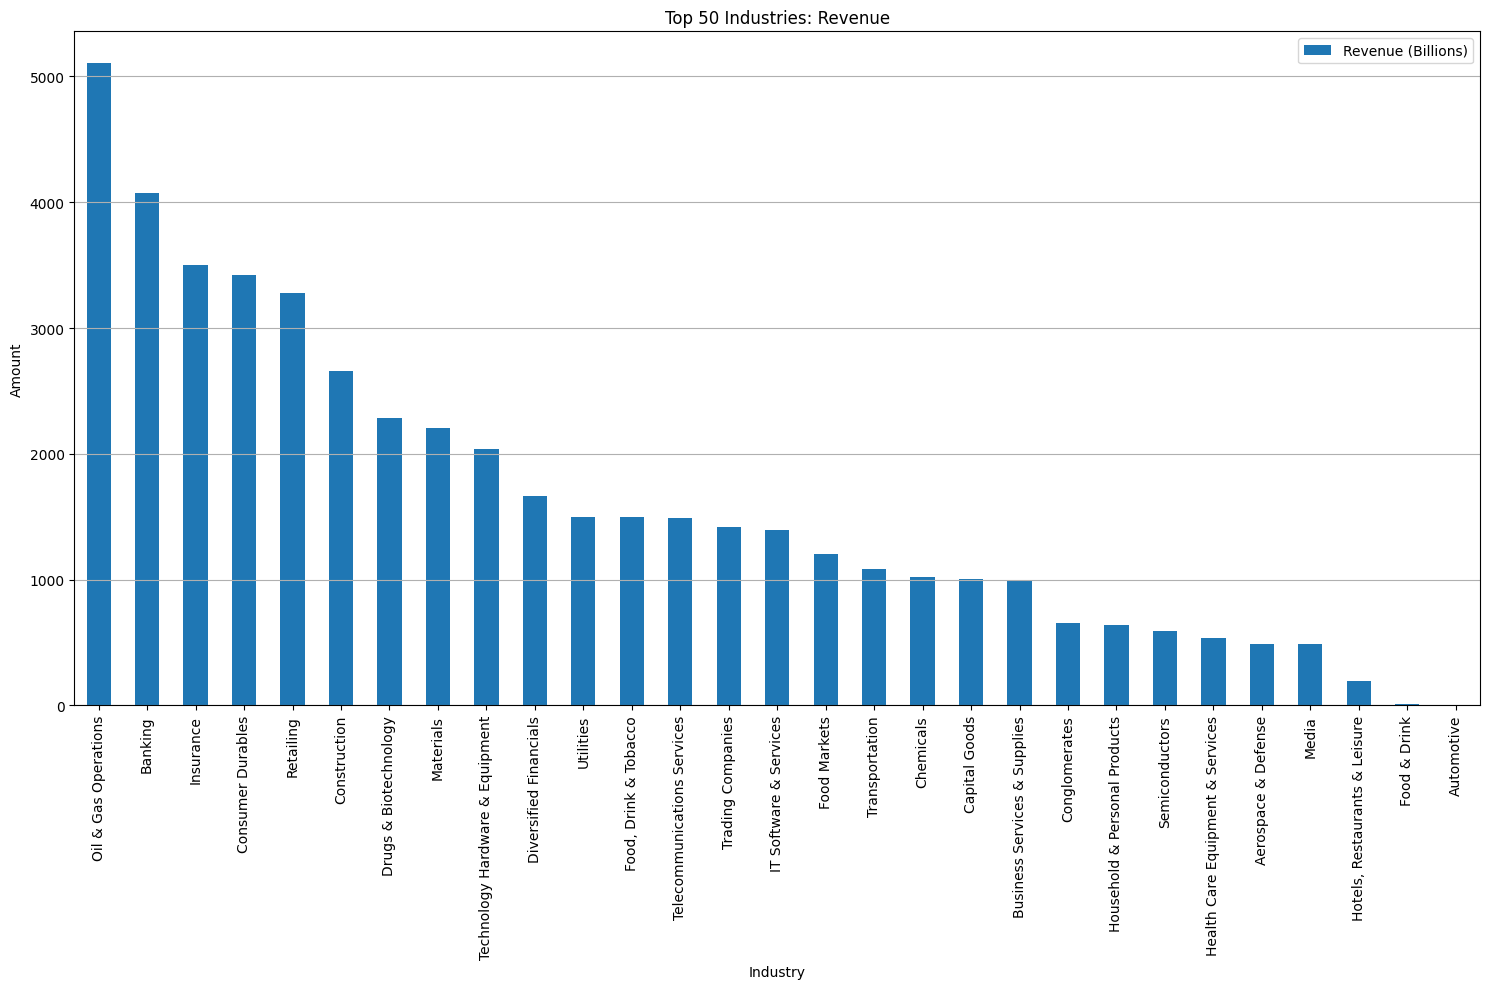

In [26]:
industry_totals = forbes_df.groupby('Industry')[['Revenue (Billions)']].sum()

industry_totals_sorted = industry_totals.sort_values(by='Revenue (Billions)', ascending=False)

top_50_industries = industry_totals_sorted.head(50)

top_50_industries.plot(kind='bar', figsize=(15, 10))
plt.title('Top 50 Industries: Revenue')
plt.xlabel('Industry')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Our hypothesis has proven to be false. The Oil and Gas industry is leading, with Banking following as a close second. Oil and Gas seems to be more lucrative in terms of revenue. 

III-A-2. Here, we create a bar chart of the top 50 industry by their profits. We expect the banking industry to top this chart, as well. 

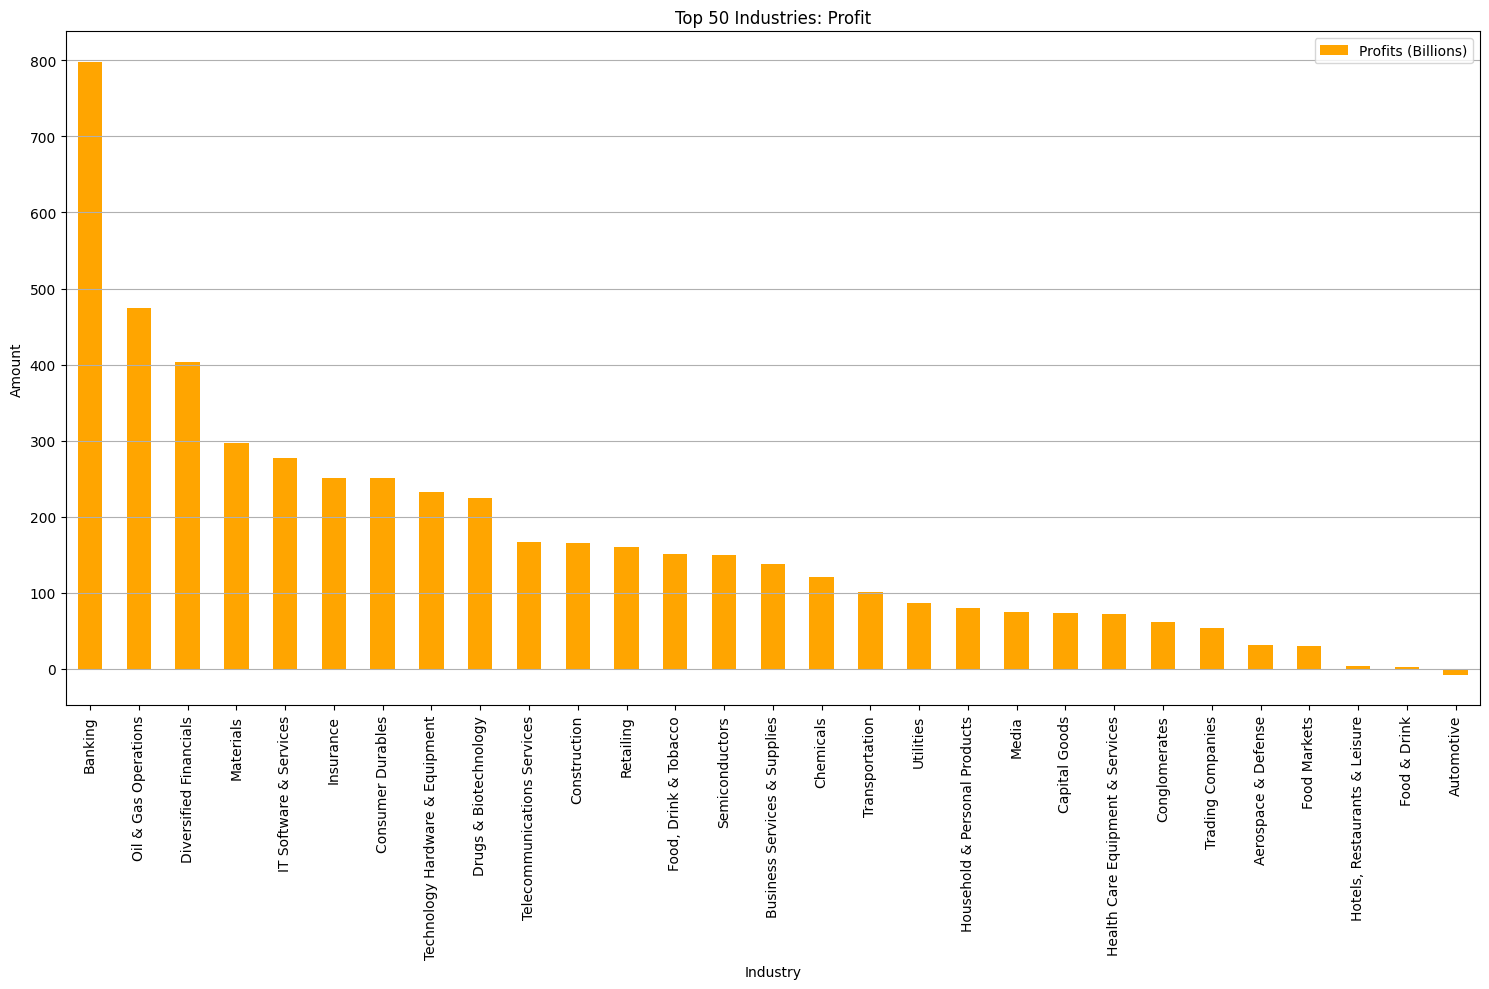

In [27]:
industry_totals = forbes_df.groupby('Industry')[['Profits (Billions)']].sum()

industry_totals_sorted = industry_totals.sort_values(by='Profits (Billions)', ascending=False)

top_50_industries = industry_totals_sorted.head(50)

top_50_industries.plot(kind='bar', figsize=(15, 10), color = ["orange"])
plt.title('Top 50 Industries: Profit')
plt.xlabel('Industry')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Our hypothesis has proven to be true. 

III-A-3. Here, we use a bar graph to denote the top 50 industries with the greatest market value. We expect a technological industry to be in the top portion of this bar graph, considering its popularity. 

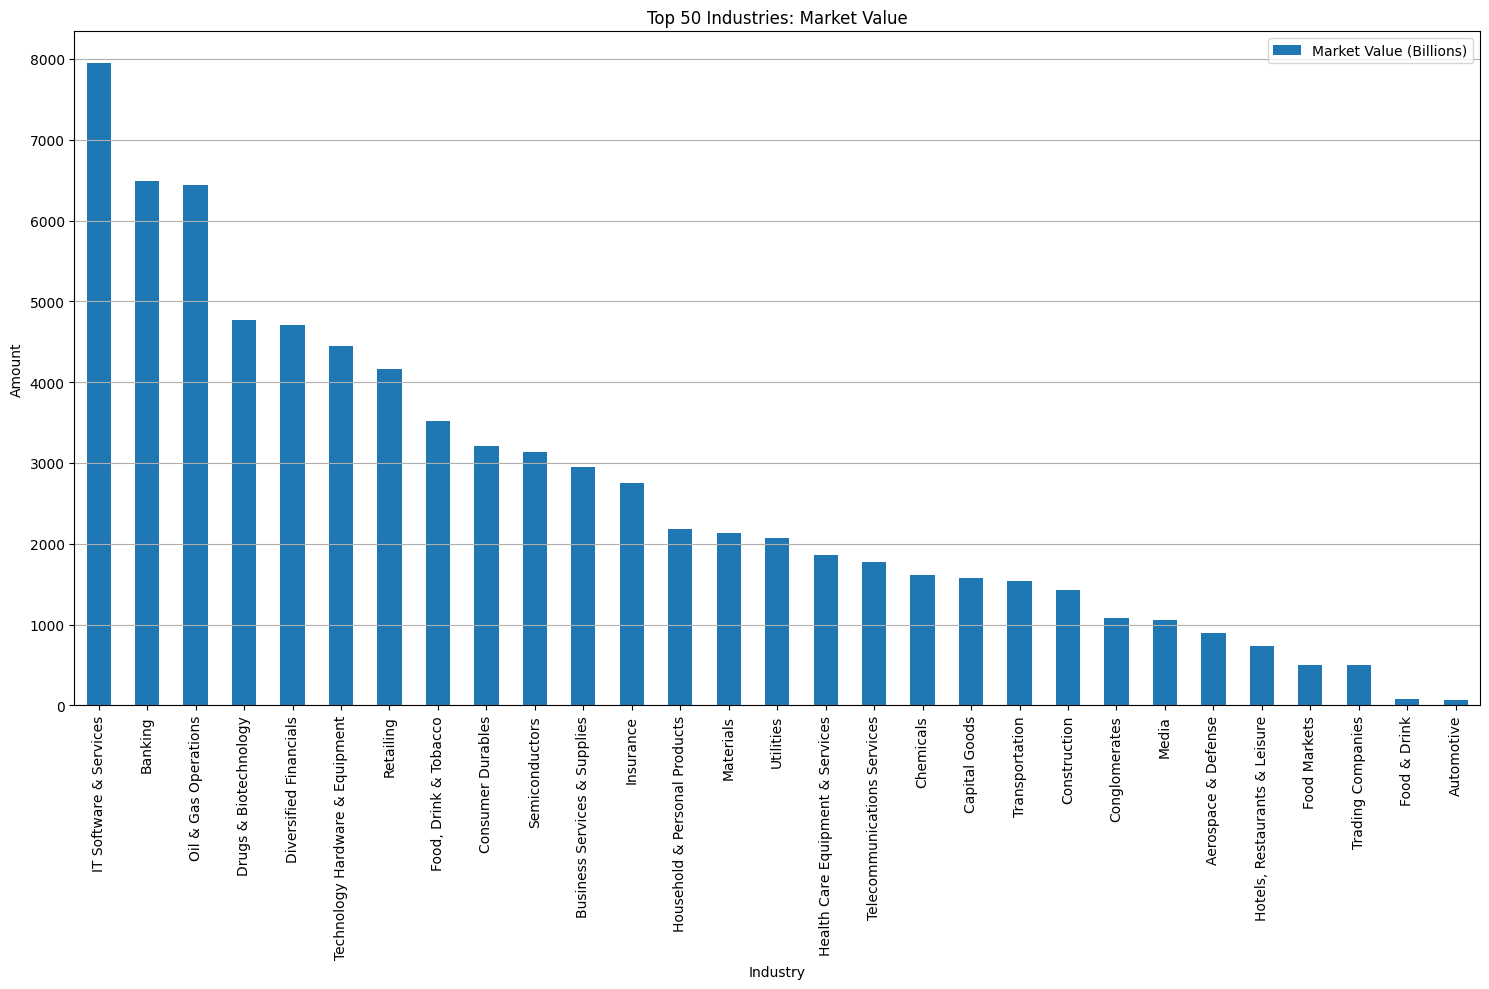

In [28]:
industry_totals = forbes_df.groupby('Industry')[['Market Value (Billions)']].sum()

industry_totals_sorted = industry_totals.sort_values(by='Market Value (Billions)', ascending=False)

top_50_industries = industry_totals_sorted.head(50)

top_50_industries.plot(kind='bar', figsize=(15, 10))
plt.title('Top 50 Industries: Market Value')
plt.xlabel('Industry')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Our hypothesis has proven to be true. IT Software & Services is leading the chart. 

III-A-4. Here, we use a bar graph to denote the top 50 industries with the greatest value of assets. We expect the banking industry to be a leader in this chart.  

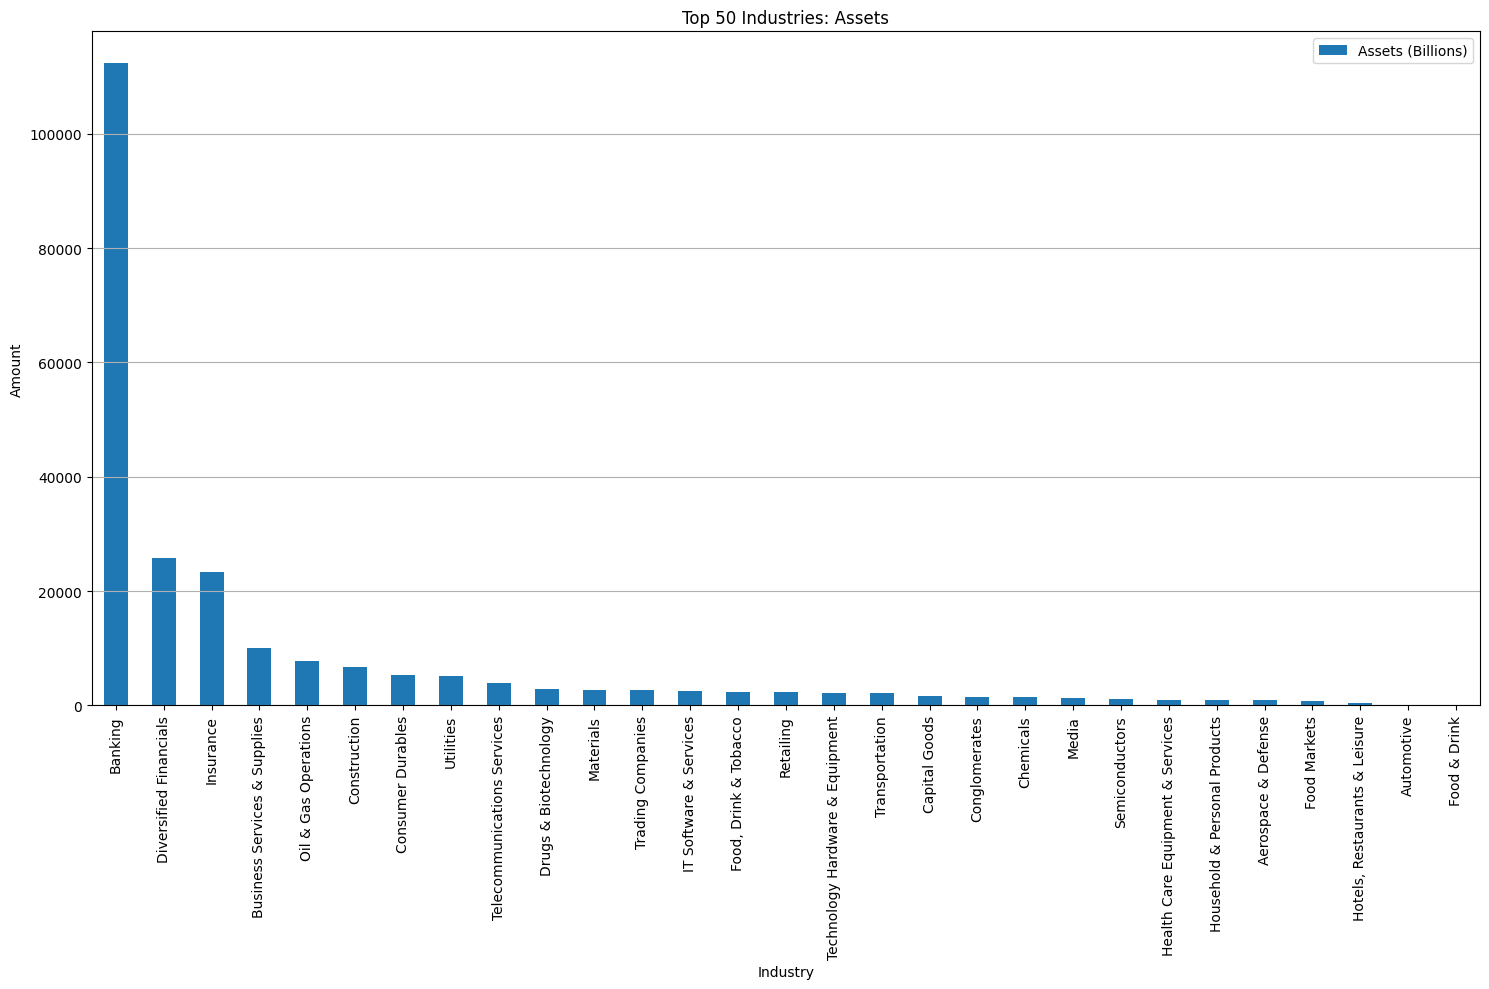

In [29]:
industry_totals = forbes_df.groupby('Industry')[['Assets (Billions)']].sum()

industry_totals_sorted = industry_totals.sort_values(by='Assets (Billions)', ascending=False)

top_50_industries = industry_totals_sorted.head(50)

top_50_industries.plot(kind='bar', figsize=(15, 10))
plt.title('Top 50 Industries: Assets')
plt.xlabel('Industry')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Our hypothesis has proven to be true. 

#### III-B: Top 50 Companies Based on Financial Metrics 
In Section III-B, we will be analyzing the top 50 companies based on financial metrics such as revenue, profit, market value, and asset value. 

III-B-1. Here, we use a bar chart to order the top 50 companies by their revenue. We expect a bank or technological company to lead the chart. 

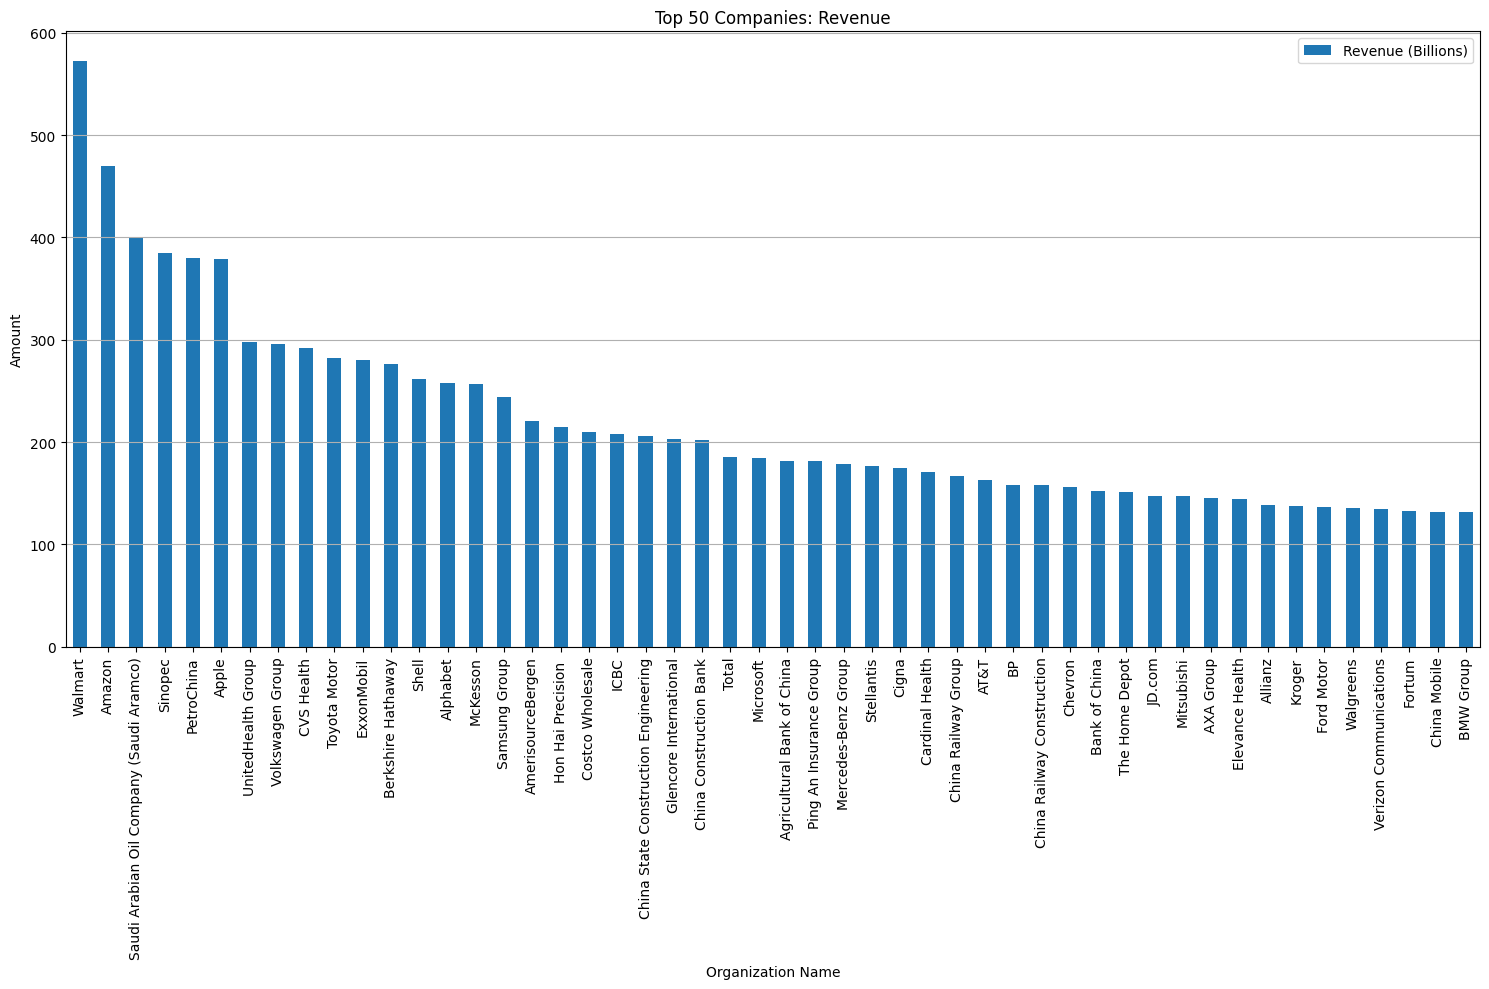

In [30]:
company_totals = forbes_df.groupby('Organization Name')[['Revenue (Billions)']].sum()

company_totals_sorted = company_totals.sort_values(by='Revenue (Billions)', ascending=False)

top_50_company = company_totals_sorted.head(50)

top_50_company.plot(kind='bar', figsize=(15, 10))
plt.title('Top 50 Companies: Revenue')
plt.xlabel('Organization Name')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Our hypothesis has proven false. Walmart, a retail company, is leading the chart for the greatest profits. 

III-B-2. Here, we use a bar chart to order the top 50 companies based on their profits. We expect a bank or technological company to lead the chart. 

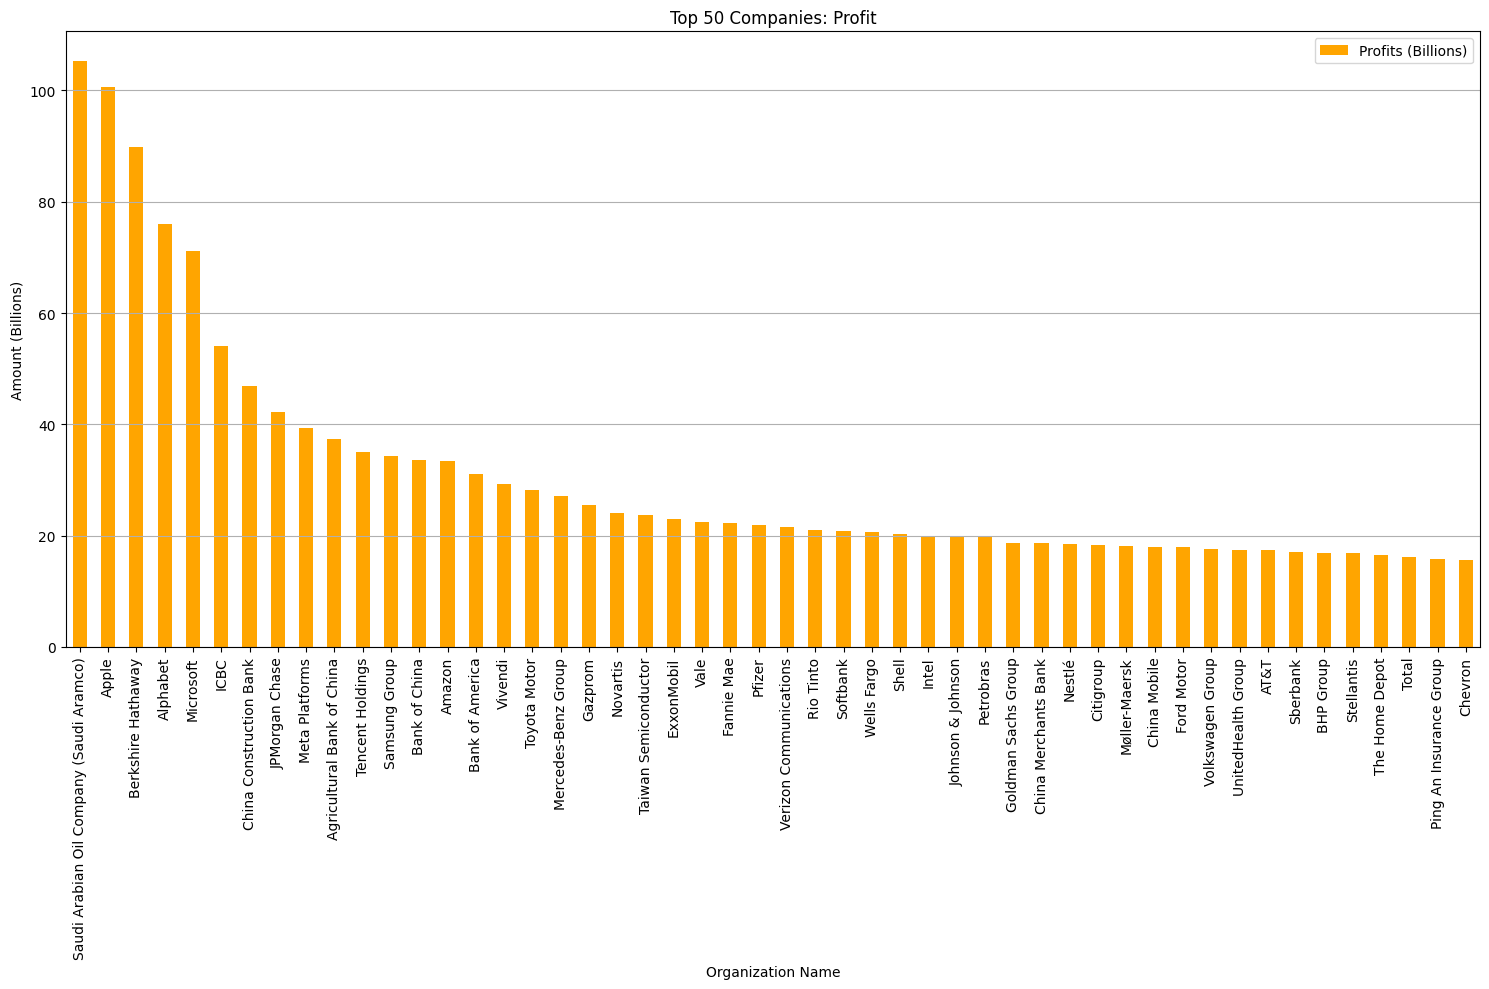

In [31]:
company_totals = forbes_df.groupby('Organization Name')[['Profits (Billions)']].sum()

company_totals_sorted = company_totals.sort_values(by='Profits (Billions)', ascending=False)

top_50_company = company_totals_sorted.head(50)

top_50_company.plot(kind='bar', figsize=(15, 10), color = "orange")
plt.title('Top 50 Companies: Profit')
plt.xlabel('Organization Name')
plt.ylabel('Amount (Billions)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Our hypothesis has proven to be false. The leading company is Saudi Aramco, which is an Oil and Gas company. 

III-B-3. Here, we use a bar graph to denote the top 50 companies with the greatest market value. We a company like Alphabet or Microsoft to be in the top portion of this bar graph, considering its popularity. 

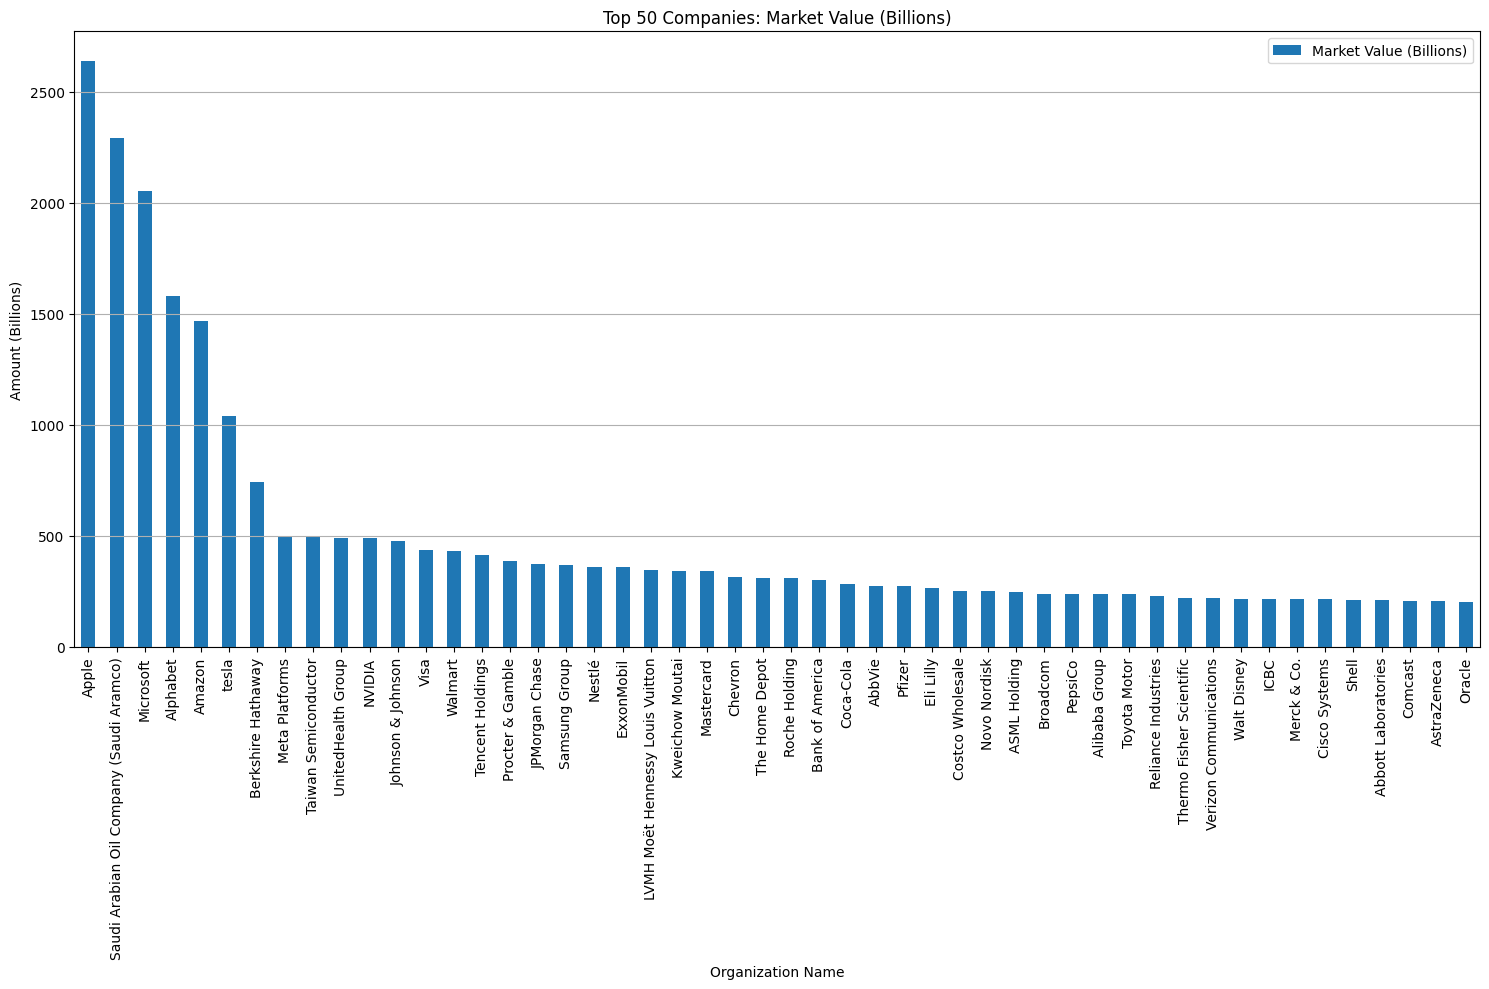

In [32]:
company_totals = forbes_df.groupby('Organization Name')[['Market Value (Billions)']].sum()

company_totals_sorted = company_totals.sort_values(by='Market Value (Billions)', ascending=False)

top_50_company = company_totals_sorted.head(50)

top_50_company.plot(kind='bar', figsize=(15, 10))
plt.title('Top 50 Companies: Market Value (Billions)')
plt.xlabel('Organization Name')
plt.ylabel('Amount (Billions)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Our hypothesis has proven to be partially true. Apple is leading, but Microsoft and Alphabet are in the top 5 companies.

III-B-4. Here, we use a bar graph to denote the top 50 companies with the greatest value of assets. We expect companies in the US or China and the banking industry to be a leader in this chart, as well.  

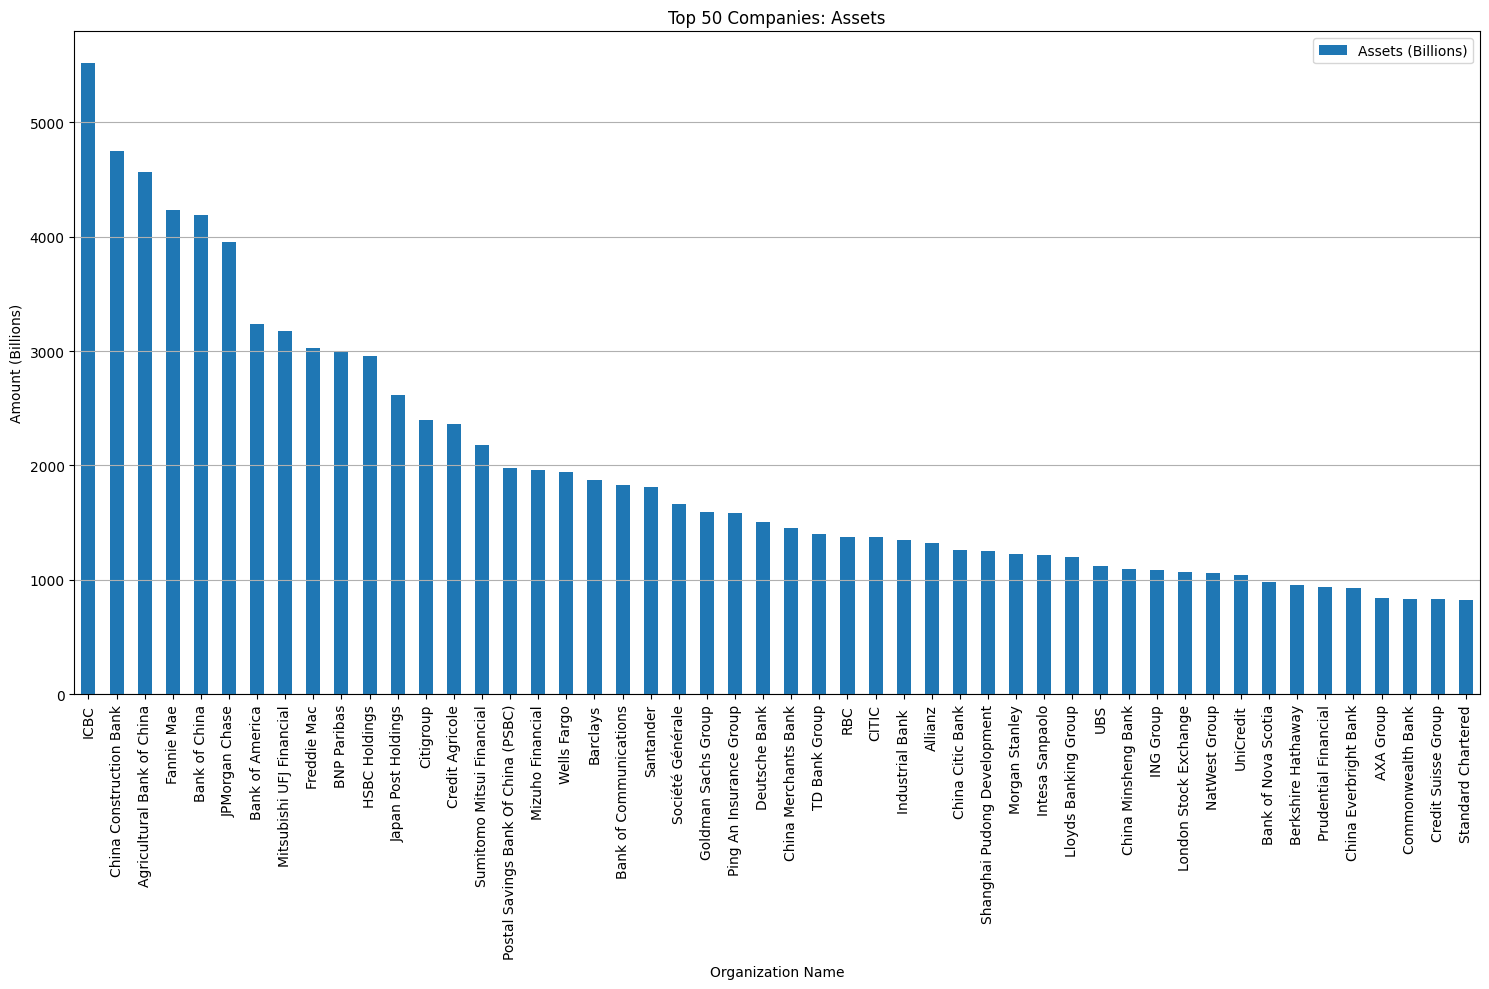

In [33]:
company_totals = forbes_df.groupby('Organization Name')[['Assets (Billions)']].sum()

company_totals_sorted = company_totals.sort_values(by='Assets (Billions)', ascending=False)

top_50_companies = company_totals_sorted.head(50)

top_50_companies.plot(kind='bar', figsize=(15, 10))
plt.title('Top 50 Companies: Assets')
plt.xlabel('Organization Name')
plt.ylabel('Amount (Billions)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Our hypothesis has proven to be true, with the top 3 companies being a part of the banking industry. 

#### III-C: Revenue-Profit Analysis
In Section III-C, we will be conducting a revenue vs. profit analysis for the top 10 industries and companies. 

III-C-1. Here, we use a comparative bar graph to analyze the differences in revenue and profit between the top 10 industries. We sort the industres by decreasing revenue. We hypothesize that the companies with larger revenues will have greater profits. 

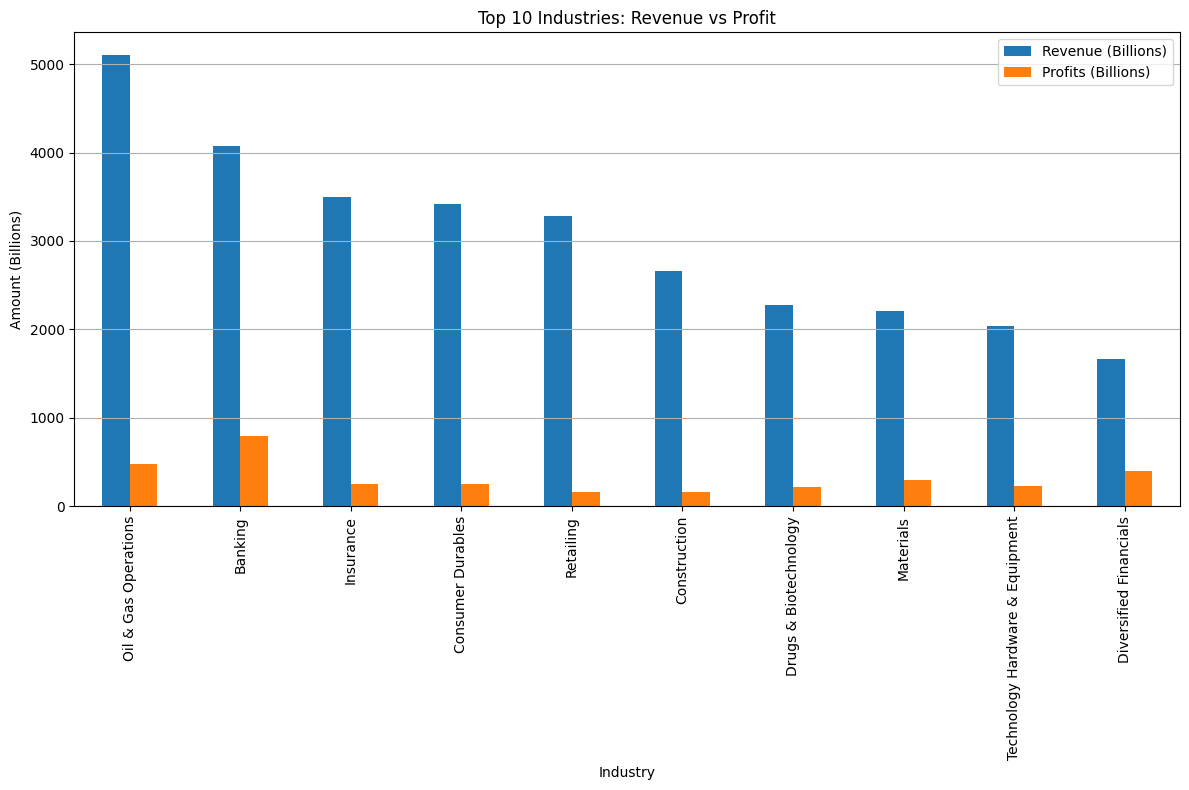

In [34]:
industry_totals = forbes_df.groupby('Industry')[['Revenue (Billions)', 'Profits (Billions)']].sum()

industry_totals_sorted = industry_totals.sort_values(by='Revenue (Billions)', ascending=False)

top_10_industries = industry_totals_sorted.head(10)

top_10_industries.plot(kind='bar', figsize=(12, 8))
plt.title('Top 10 Industries: Revenue vs Profit')
plt.xlabel('Industry')
plt.ylabel('Amount (Billions)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Our hypothesis has proven to be false. We notice that the Oil & Gas industry makes the greatest revenue, however the profits in this industry are not as high as the profits in the banking industry. This could possibly be attributed to political or governmental changes that may dictate the state of the oil and gas industry. 

III-C-2. Here, we use a comparative bar graph to analyze the differences in revenue and profit between the top 10 companies. We sort the companies by decreasing revenue. We hypothesize that the companies with larger revenues will have greater profits. 

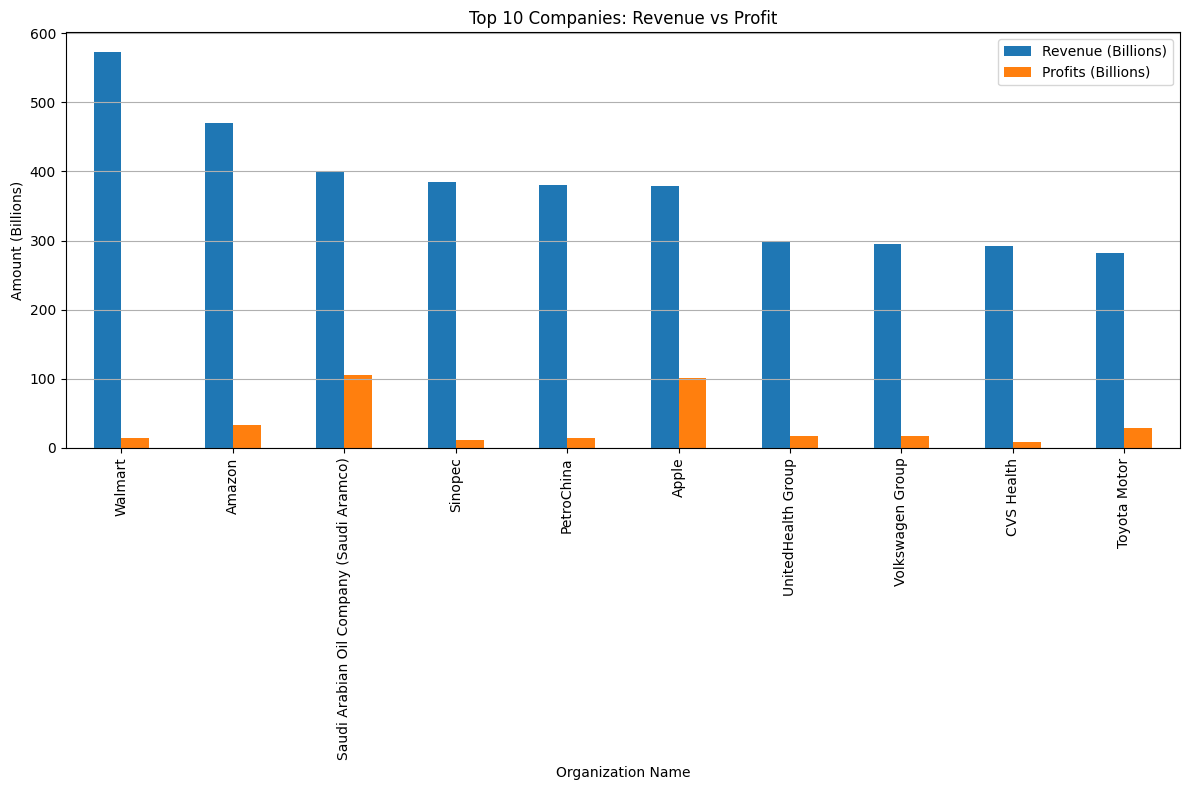

In [35]:
company_totals = forbes_df.groupby('Organization Name')[['Revenue (Billions)', 'Profits (Billions)']].sum()

company_totals_sorted = company_totals.sort_values(by='Revenue (Billions)', ascending=False)

top_10_companies = company_totals_sorted.head(10)

top_10_companies.plot(kind='bar', figsize=(12, 8))
plt.title('Top 10 Companies: Revenue vs Profit')
plt.xlabel('Organization Name')
plt.ylabel('Amount (Billions)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Our hypothesis has proven to be false. We notice that Walmart is leading with the largest revenue. However, it does not make the greatest profit. This might be attributed to the fact that Walmart is the leading employeer out of all 2000 companies. Thus, a large portion of the revenue might be attributed to salaries and wages. 

#### III-D: Point System Analysis and the Top 5 Overall Leaders (Companies)
In Section III-D, we aim to determine which three companies are the overall leader. In Section III-B, we analyzed various business metrics for only the top 50 companies. Now, we hope to use these metrics to determine which three companies were the overall leaders in the 2022 market. 

We aim to do this by implementing a point system. We will assign point values to every company, starting from 1901 down to 1, based on their ranking in each of the four categories: revenue, profit, market value, and assets. Let's say the rankings of Company X are as follows: #1 in Revenue, #5 in Profit, #2 in Market Value, #50 in Assets. Company X would have the following points: 1901 (Revenue) + 1897 (Profit) + 1900 (Market Value) + 1 (Assets) = 5699 total points. Next, we will take the average of these values, to determine an overall score for the company: 5699/4 = 1424.75. Therefore, Company X has a score of 36.5

Using this concept, we will be able to generate a more accurate ordering of the top 50 companies in the dataset. 

_Note: We use '1901' as the starting point because post-processing and cleaning the data we are left with only 1901 clean rows of information from the Forbes dataframe._

III-D.1: Dataframe Set-up

In [36]:
points_df = pd.DataFrame(columns=['Organization Name', 'Total Points', 'Overall Score'])
points_df['Organization Name'] = forbes_df['Organization Name']
points_df.head()

,Organization Name,Total Points,Overall Score
2022 Ranking,,,
1,Berkshire Hathaway,NaN,NaN
2,ICBC,NaN,NaN
3,Saudi Arabian Oil Company (Saudi Aramco),NaN,NaN
4,JPMorgan Chase,NaN,NaN
5,China Construction Bank,NaN,NaN


_Section III-D.2 to III-D.5 will perform the explained point system analysis on four columns of data: Revenue, Profits, Market Value, and Assets._

III-D.2: Revenue Point System Analysis

In [37]:
rev_totals = forbes_df.groupby('Organization Name')[['Revenue (Billions)']].sum()
rev_totals_sorted = rev_totals.sort_values(by='Revenue (Billions)', ascending=False)
rev_totals_sorted["Revenue Point Values"] = range(1901, 1901 - len(rev_totals_sorted), -1)

rev_totals_sorted.head()



,Revenue (Billions),Revenue Point Values
Organization Name,,
Walmart,572.75,1901
Amazon,469.82,1900
Saudi Arabian Oil Company (Saudi Aramco),400.38,1899
Sinopec,384.82,1898
PetroChina,380.31,1897


III-D.3: Profits Point System Analysis

In [38]:
prof_totals = forbes_df.groupby('Organization Name')[['Profits (Billions)']].sum()
prof_totals_sorted = prof_totals.sort_values(by='Profits (Billions)', ascending=False)
prof_totals_sorted["Profit Point Values"] = range(1901, 1901 - len(prof_totals_sorted), -1)

prof_totals_sorted.head()



,Profits (Billions),Profit Point Values
Organization Name,,
Saudi Arabian Oil Company (Saudi Aramco),105.36,1901
Apple,100.56,1900
Berkshire Hathaway,89.80,1899
Alphabet,76.03,1898
Microsoft,71.18,1897


III-D.4: Market Value Point System Analysis

In [39]:
mv_totals = forbes_df.groupby('Organization Name')[['Market Value (Billions)']].sum()
mv_totals_sorted = mv_totals.sort_values(by='Market Value (Billions)', ascending=False)
mv_totals_sorted["Market Value Point Values"] = range(1901, 1901 - len(mv_totals_sorted), -1)

mv_totals_sorted.head()



,Market Value (Billions),Market Value Point Values
Organization Name,,
Apple,2640.32,1901
Saudi Arabian Oil Company (Saudi Aramco),2292.08,1900
Microsoft,2054.37,1899
Alphabet,1581.72,1898
Amazon,1468.40,1897


III-D.5: Assets Point System Analysis

In [40]:
assets_totals = forbes_df.groupby('Organization Name')[['Assets (Billions)']].sum()
assets_totals_sorted = assets_totals.sort_values(by='Assets (Billions)', ascending=False)
assets_totals_sorted["Assets Point Values"] = range(1901, 1901 - len(assets_totals_sorted), -1)

assets_totals_sorted.head()



,Assets (Billions),Assets Point Values
Organization Name,,
ICBC,5518.51,1901
China Construction Bank,4746.95,1900
Agricultural Bank of China,4561.05,1899
Fannie Mae,4229.90,1898
Bank of China,4192.84,1897


III-D.6: Combined Point System Analysis

Here, we combine all of the individual points into a new dataframe, to calculate the total points and overall score of all companies. 

In [41]:
points_df = points_df.join(rev_totals_sorted.rename(columns={'Revenue Points': 'Revenue Point Values'}), on='Organization Name', how='left')
points_df = points_df.join(prof_totals_sorted.rename(columns={'Profit Points': 'Profit Point Values'}), on='Organization Name', how='left')
points_df = points_df.join(mv_totals_sorted.rename(columns={'Market Value Points': 'Market Value Point Values'}), on='Organization Name', how='left')
points_df = points_df.join(assets_totals_sorted.rename(columns={'Market Value Points': 'Assets Point Values'}), on='Organization Name', how='left')

points_df.fillna(0, inplace=True)

points_df['Total Points'] = points_df['Revenue Point Values'] + points_df['Profit Point Values'] + points_df['Market Value Point Values'] + points_df['Assets Point Values']
points_df['Overall Score'] = points_df['Total Points'] / 4

C:\Users\deshn\AppData\Local\Temp\ipykernel_24740\1866470500.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  points_df.fillna(0, inplace=True)


In [42]:
points_df = points_df.sort_values(by='Overall Score', ascending=False)
points_df.head()


,Organization Name,Total Points,Overall Score,Revenue (Billions),Revenue Point Values,Profits (Billions),Profit Point Values,Market Value (Billions),Market Value Point Values,Assets (Billions),Assets Point Values
2022 Ranking,,,,,,,,,,,
1,Berkshire Hathaway,7542,1885.50,276.09,1890,89.80,1899,741.48,1895,958.78,1858
2,ICBC,7538,1884.50,208.13,1882,54.03,1896,214.42,1859,5518.51,1901
3,Saudi Arabian Oil Company (Saudi Aramco),7532,1883.00,400.38,1899,105.36,1901,2292.08,1900,576.04,1832
4,JPMorgan Chase,7518,1879.50,124.54,1843,42.12,1894,374.45,1885,3954.69,1896
5,China Construction Bank,7517,1879.25,202.07,1879,46.89,1895,181.32,1843,4746.95,1900


Surprisingly, we can see that the original ranking system holds true even after our point analysis. Initially, we had expected Forbes would attribute non-financial parameters, such as company culture, or employee satisfaction into ranking these companies. However, from our analysis it is clear that Forbes is looking at the companies from a strictly financial perspective. This also implied that our financial analysis an point system is a viable form of understanding which companies rank amongst the top 5. 

#### III-E: Point System Analysis and a New Ranking System (Industry)
In Section III-D, we aim to determine which three industries are the overall leader. In Section III-A, we analyzed various business metrics for only the top industries. Now, we hope to use these metrics to determine which three industries were the overall leaders in the 2022 market. 

We aim to do this by implementing a point system, similar to the one implemented in Section III-D. We will assign point values to every industry, starting from 29 down to 1, based on their ranking in each of the four categories: revenue, profit, market value, and assets. Let's say the rankings of Industry X are as follows: #1 in Revenue, #5 in Profit, #2 in Market Value, #50 in Assets. Company X would have the following points: 29 (Revenue) + 25 (Profit) + 28 (Market Value) + 1 (Assets) = 83 total points. Next, we will take the average of these values, to determine an overall score for the company: 83/4 = 20.75. Therefore, Company X has a score of 20.75

Using this concept, we will be able to generate a more accurate ordering of the industries in the dataset. 

_Note: We use '29' as the starting point because post-processing and cleaning the data we are left with only 29 unique industries in the Forbes dataframe._

III-E.1: Dataframe Set-up

In [43]:
ind_points_df = pd.DataFrame(columns=['Industry Name', 'Total Points', 'Overall Score'])
ind_points_df['Industry Name'] = forbes_df['Industry']
ind_points_df.head()

,Industry Name,Total Points,Overall Score
2022 Ranking,,,
1,Diversified Financials,NaN,NaN
2,Banking,NaN,NaN
3,Oil & Gas Operations,NaN,NaN
4,Diversified Financials,NaN,NaN
5,Banking,NaN,NaN


_Section III-E.2 to III-E.5 will perform the explained point system analysis on four columns of data: Revenue, Profits, Market Value, and Assets._

III-E.2: Revenue Point System Analysis

In [44]:
rev_totals = forbes_df.groupby('Industry')[['Revenue (Billions)']].sum()
rev_totals_sorted = rev_totals.sort_values(by='Revenue (Billions)', ascending=False)
rev_totals_sorted["Revenue Point Values"] = range(29, 29 - len(rev_totals_sorted), -1)

rev_totals_sorted.head()

,Revenue (Billions),Revenue Point Values
Industry,,
Oil & Gas Operations,5103.78,29
Banking,4073.55,28
Insurance,3499.74,27
Consumer Durables,3419.72,26
Retailing,3279.99,25


III-E.3: Profits Point System Analysis

In [45]:
prof_totals = forbes_df.groupby('Industry')[['Profits (Billions)']].sum()
prof_totals_sorted = prof_totals.sort_values(by='Profits (Billions)', ascending=False)
prof_totals_sorted["Profit Point Values"] = range(29, 29 - len(prof_totals_sorted), -1)

prof_totals_sorted.head()


,Profits (Billions),Profit Point Values
Industry,,
Banking,797.85,29
Oil & Gas Operations,474.24,28
Diversified Financials,402.76,27
Materials,297.43,26
IT Software & Services,276.72,25


III-E.4: Market Value Point System Analysis

In [46]:
mv_totals = forbes_df.groupby('Industry')[['Market Value (Billions)']].sum()
mv_totals_sorted = mv_totals.sort_values(by='Market Value (Billions)', ascending=False)
mv_totals_sorted["Market Value Point Values"] = range(29, 29 - len(mv_totals_sorted), -1)

mv_totals_sorted.head()

,Market Value (Billions),Market Value Point Values
Industry,,
IT Software & Services,7944.52,29
Banking,6489.81,28
Oil & Gas Operations,6437.66,27
Drugs & Biotechnology,4768.64,26
Diversified Financials,4702.47,25


III-E.5: Assets Point System Analysis

In [47]:
assets_totals = forbes_df.groupby('Industry')[['Assets (Billions)']].sum()
assets_totals_sorted = assets_totals.sort_values(by='Assets (Billions)', ascending=False)
assets_totals_sorted["Assets Point Values"] = range(29, 29 - len(assets_totals_sorted), -1)

assets_totals_sorted.head()

,Assets (Billions),Assets Point Values
Industry,,
Banking,112312.26,29
Diversified Financials,25806.85,28
Insurance,23247.93,27
Business Services & Supplies,9973.51,26
Oil & Gas Operations,7720.37,25


III-E.6: Combined Point System Analysis

In [48]:
ind_points_df = ind_points_df.join(rev_totals_sorted.rename(columns={'Revenue Points': 'Revenue Point Values'}), on='Industry Name', how='left')
ind_points_df = ind_points_df.join(prof_totals_sorted.rename(columns={'Profit Points': 'Profit Point Values'}), on='Industry Name', how='left')
ind_points_df = ind_points_df.join(mv_totals_sorted.rename(columns={'Market Value Points': 'Market Value Point Values'}), on='Industry Name', how='left')
ind_points_df = ind_points_df.join(assets_totals_sorted.rename(columns={'Market Value Points': 'Assets Point Values'}), on='Industry Name', how='left')

ind_points_df.fillna(0, inplace=True)

ind_points_df['Total Points'] = ind_points_df['Revenue Point Values'] + ind_points_df['Profit Point Values'] + ind_points_df['Market Value Point Values'] + ind_points_df['Assets Point Values']
ind_points_df['Overall Score'] = ind_points_df['Total Points'] / 4

C:\Users\deshn\AppData\Local\Temp\ipykernel_24740\2877564425.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ind_points_df.fillna(0, inplace=True)


In [49]:
ind_points_df = ind_points_df.sort_values(by='Overall Score', ascending=False)
ind_points_df.drop_duplicates(inplace=True)
ind_points_df.reset_index(inplace=True)
ind_points_df = ind_points_df.drop('2022 Ranking', axis=1)

ind_points_df.index = range(1, len(ind_points_df) + 1)
ind_points_df

,Industry Name,Total Points,Overall Score,Revenue (Billions),Revenue Point Values,Profits (Billions),Profit Point Values,Market Value (Billions),Market Value Point Values,Assets (Billions),Assets Point Values
1,Banking,114,28.50,4073.55,28,797.85,29,6489.81,28,112312.26,29
2,Oil & Gas Operations,109,27.25,5103.78,29,474.24,28,6437.66,27,7720.37,25
3,Diversified Financials,100,25.00,1667.27,20,402.76,27,4702.47,25,25806.85,28
4,Insurance,96,24.00,3499.74,27,250.89,24,2751.31,18,23247.93,27
5,Consumer Durables,93,23.25,3419.72,26,250.24,23,3213.82,21,5319.52,23
6,Drugs & Biotechnology,90,22.50,2281.69,23,224.17,21,4768.64,26,2936.48,20
7,IT Software & Services,86,21.50,1390.23,15,276.72,25,7944.52,29,2577.50,17
8,Materials,83,20.75,2204.75,22,297.43,26,2137.95,16,2728.79,19
9,Technology Hardware & Equipment,81,20.25,2040.33,21,232.17,22,4448.13,24,2223.12,14
10,Retailing,81,20.25,3279.99,25,160.16,18,4167.27,23,2374.75,15


As we can see, Banking remains the leading industry. This was an expected result because most of our prior analysis has shown us that banking is leading most of the chart in terms of financials. However, we notice that there is not a direct correlation between popularity of the industry and its overall ranking. For example, the Insurance industry is among the top 5, whereas in previous analysis it ranks below that range. Similary the Drugs & Biotechnology industry was not in the top 10 in terms of popularity. However, here it is ranked at number 6. Therefore, we can conclude that our point system analysis has helped us look at the top industries across the top 2000 companies in a new format, and understand the overall performance of all of the industries. 

#### III-F: Employee Counts and Industry Ranking
In prior sections we have analyzed the relationship between total number of employees and the revenue for each company. In Section III-F, we hope to determine the relationship between and industry's ranking (based on the analysis in Section III-E) and the number of people employees across that industry. 

III-F.1: In this section we create a new dataframe, to store the average number of employees in each industry. Our goal is to be able to plot this new dataframe to understand the trends and relationship between employee counts and industry ranking. 

In [50]:
average_employees_by_industry = forbes_df.groupby('Industry')['Total Employees'].mean().round(2)
average_employees_by_industry_df = pd.DataFrame(average_employees_by_industry, index=average_employees_by_industry.index)
average_employees_by_industry_df = average_employees_by_industry_df.rename(columns={'Total Employees': 'Average Employees'})
average_employees_by_industry_df.head()

,Average Employees
Industry,
Aerospace & Defense,70953.89
Automotive,7161.00
Banking,34524.79
Business Services & Supplies,41486.16
Capital Goods,53381.85


III-F.2: Here, we add the total points for each industry (as calculated in the prior section) to the new dataframe to prepare it for plotting. 

In [51]:
merged_df = pd.merge(ind_points_df, average_employees_by_industry_df, left_on='Industry Name', right_on='Industry')
merged_df.index = range(1, len(merged_df) + 1)
print("Average Number of Employees Across ALL Industries: ", merged_df["Average Employees"].mean().round())
merged_df = merged_df[["Industry Name", "Total Points", "Average Employees"]]
merged_df

Average Number of Employees Across ALL Industries:  57127.0


,Industry Name,Total Points,Average Employees
1,Banking,114,34524.79
2,Oil & Gas Operations,109,35624.57
3,Diversified Financials,100,19678.41
4,Insurance,96,37076.53
5,Consumer Durables,93,86797.24
6,Drugs & Biotechnology,90,38600.06
7,IT Software & Services,86,64001.68
8,Materials,83,33390.86
9,Technology Hardware & Equipment,81,78667.60
10,Retailing,81,156583.11


III-F.3: In this section, we use our dataframe to create a positive/negative bar graph to depict how many standard deviations each industry's average employee count is from the mean. The blue line at the center represents the average number of employees, with each orange bar representing whether the industry is above the mean or below the mean. 

Mean: 57127.38310344827


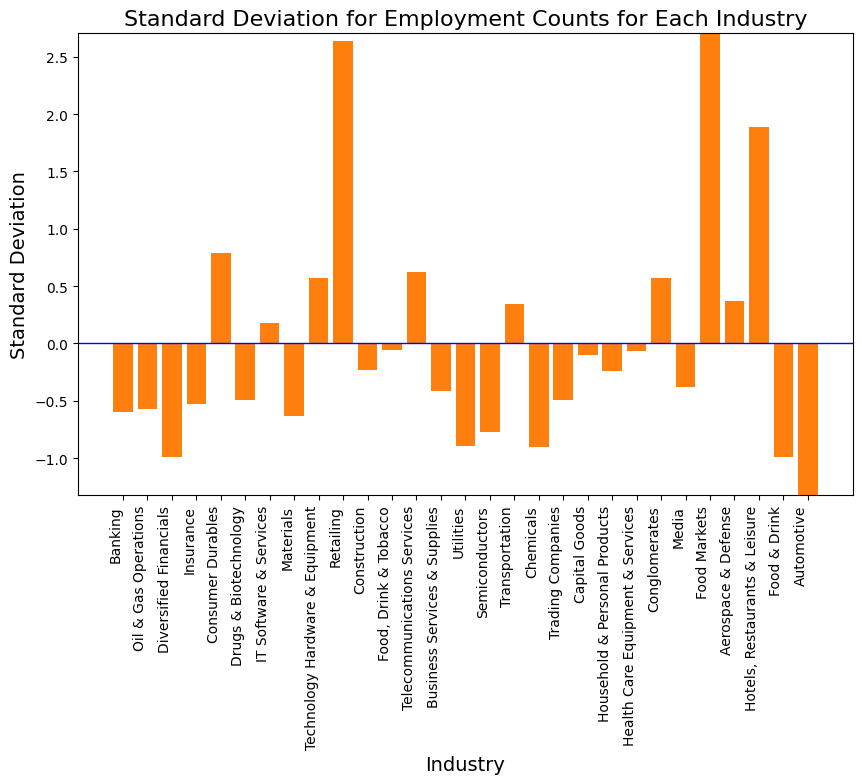

In [52]:
# For each industry, graphing how many std each value is from the mean
average = merged_df['Average Employees'].mean()
std_deviation = merged_df['Average Employees'].std()
upper_bound = average + std_deviation
lower_bound = average - std_deviation

print("Mean:", average); 

plt.figure(figsize=(10, 6))
plt.bar(merged_df.index, (merged_df['Average Employees'] - average) / std_deviation, label='Positive Deviation')
plt.bar(merged_df.index, (average - merged_df['Average Employees']) / std_deviation, bottom=-(average - merged_df['Average Employees']) / std_deviation, label='Negative Deviation')
plt.axhline(y=0, color='blue', linestyle='-', linewidth=1)  # Horizontal line at 0
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Standard Deviation', fontsize=14)
plt.title('Standard Deviation for Employment Counts for Each Industry', fontsize=16)
plt.xticks(merged_df.index, merged_df['Industry Name'], rotation=90, ha='right')
plt.show()

Here, we notice that there are far fewer industries that have an above average number of employees. Only 10 industries employee more than the average, which is approximately 57,000 people. The remaning 19 industries employee less than the average. If we take a closer look at the graph, we notice that Food Markets and Retail are the two most prominent industries that employee more than the average number of employees. Logically, this makes sense, as Retail and Food Markets are two of the most common customer-facing industries, hence, due to the live human-to-human interaction, coupled with any backend corporate employment, Retail and Food Markets would employee much more than the average. Additionally, we see that the automotive industry is the furthest below the mean. This is surprising because the automotive is large and spread across the world, however we can attribute this low number to the fact that not many automotive industries have made it to the top 2000. Due to this, the automotive industry will lag behind other top 2000 companies, and as a result, employee fewer than average. 

Unforunately, there are no visible trends between the industry ranking and employee counts as we first expected. 

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

### SECTION IV - Summary


#### IV-A: Revisiting The Primary Hypotheses

Throughout this notebook, we have mentioned minor hypotheses and predictions we made at each step of the analysis. However, there were three major hypotheses we devised at the start of Section III - Advanced Analysis: 

1. _If Forbes has taken into account non-financial metrics (such as sustainable practices, employee retention/satisfaction) to determine the ranking of the companies, then the financial metrics analysis we perform will lead to a vastly differently ranking for the top 2000 companies._

2. _If the banking industry has been leading across various metrics as seen in Section II - General Analysis, then the banking industry will rank within the top 5 overall industries. We hypothesize that the popularity of each industry (or, frequency at which it appears in the dataset), will be strongly correlated to its overall industry ranking_

3. _If a industry ranks higher overall, then it is more likely to employee a larger number of people. We hypothesize that there will be a directly proportional relationship between industry ranking and employee counts._


#### IV-B: Results

The purpose of this project was to determine if our hypotheses were true or false, after performing various forms of analysis on the data. We can address each hypothesis individually. 

1. We initally assmed that an instituion like Forbes might consider factors beyond a company's financial performance in the year 2022 when ranking it. We hoped that Forbes had taken into account qualitative methods such as employee retention or a company's inclination towards sustainability, metrics that aren't quantifiable by a simple number, when ranking the top 2000 companies across the world. Based on this assumption, we develop a point system to analyze the companies solely from a financial perspective. As our results indicated, the ranking generated by Forbes was identical to the ranking generated by our analysis. Therefore, our hypothesis was proven false, because Forbes used similar logic to ours when determining a company's ranking. 

2. Throughout the General Analysis section we had noticed that the banking industry was generally the leader among various forms of analysis. Therefore, we hypothesized that the banking industry would also continue to be the overall leading industry when financial metrics were analyzed. From our results, it is clear that the banking industry remained the leader. Therefore, our hypothesis was partially true. We had also hypothesized that the popularity of each industry would be strongly correlated its overall ranking. However, as explained Section III-E.6, this was not the case. There was no direct correlation between the industry's popularity and its overall financial standing. Therefore, this part of our hypothesis was proven to be false. 

3. Finally, in our last hypothesis we hoped to find a directly proportional relationship between an industry's rank and the number of employees it retains. We believed that the stronger a company was performing financially, the more likely it was to employee more people to achieve this high financial capability. However, from our bar graph that compared the industry ranks to their deviation from the average number of employers, we noticed that there was no correlation between the two. Our hypothesis was proven to be false, as there was no clear trend or relationship between how well an industry was performing financially versus the number of people the industry employed on average. 

Overall, hypothesis 1 and 3 were proven to be false, whereas hypothesis 2 was partially correct.

#### IV-C: Future Ideas and Analysis

To expand upon this analysis, in the future, we would scrape data from Forbes to determine the top 2000 companies in other years. This dataset could help us perform an analysis in the trends in data over time. 

#### IV-D: Conclusion

Throughout this notebook, we have performed various forms of analysis, primarily financial, on the Forbes Top 2000 dataset. Using the techniques we have learned in this class, we were able to thoroughly analyze the dataset and understand the trends of the market in 2022. We were able to determine which industries were the most lucrative and which industries faced the most difficulties in 2022. Beyond financial analysis, we were also able to conduct an analysis on the predicted Genders and Ethnicities of the CEOs of the top 2000 comapnies. Using a heatmap, we were also able to determine which countries were epicenters for new start-ups and companies. 

In conclsuion, the vast scope of our analysis has helped us paint a picture of the economic state of the top 2000 companies across the world. 